<a href="https://colab.research.google.com/github/boobopbiboop/saudi-employee-atrition/blob/main/CTGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
!pip install catboost
!pip install ctgan
!pip install scikit-learn imbalanced-learn
!pip install ctabgan
!pip install "sdv>=1.16.0" --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.5 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement ctabgan (from versions: none)
ERROR: No matching distribution found for ctabgan
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.3/197.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.3/198.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.6 MB/s eta 0:00:00


# Import

In [ ]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import RFE

#  Metrics & Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

# ML - Single Learning Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# ML - Ensemble Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from scipy.stats import uniform, randint

# GAN
from ctgan import CTGAN
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

In [ ]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# '/content/drive/MyDrive/dataset-saudia'

Mounted at /content/drive


# Load

In [ ]:
#placeholder manual input
df = pd.read_excel("/content/drive/MyDrive/dataset-saudia/Original Dataset of Employee Attrition.xlsx")
df_raw = df.copy()
df.head(10)

,ID,Attrition,Gender,Age,Maritalstatus,Academic_degree,Years_Experience,Years_experience_lastorganization,Sector,Department,...,Job_Engagement,Distance_to_work,Work_Live_Balance,Physical_Stress,Psychological_Exhaustion,Job_Stability,Health_Issues,Environment_Satisfaction,Job_Satisfaction,Job_Opportunities
0,11,Yes,Female,31 to 40,Married,Master's,Less than 5 years,Less than 5 years,Medical sector,Accounting,...,Medium,Medium,Medium,Yes,No,No,Yes,Medium,Not satisfied,Yes
1,12,No,Female,21 to 30,Single,Master's,Less than 5 years,Less than 5 years,Medical sector,Accounting,...,Medium,Medium,Medium,No,No,Yes,No,Medium,Satisfied,No
2,13,No,Female,21 to 30,Single,Bachelor's,Less than 5 years,Less than 5 years,Education sector,Teaching,...,Medium,Close,Medium,Yes,Sometimes,No,No,Medium,Satisfied,Yes
3,14,No,Female,21 to 30,Single,Bachelor's,Less than 5 years,Less than 5 years,Education sector,Teaching,...,Medium,Medium,Medium,Yes,Yes,No,No,Low,Not satisfied,No
4,15,No,Female,21 to 30,Single,Bachelor's,Less than 5 years,Less than 5 years,Education sector,Teaching,...,Medium,Medium,Medium,Sometimes,Sometimes,No,No,Medium,Not satisfied,No
5,16,No,Female,21 to 30,Single,Bachelor's,Less than 5 years,Less than 5 years,Education sector,Teaching,...,Medium,Close,Medium,Yes,Yes,No,No,Low,Not satisfied,Yes
6,17,Yes,Female,31 to 40,Married,Bachelor's,Less than 5 years,Less than 5 years,Education sector,Teaching,...,Medium,Close,Difficult,Yes,Yes,No,No,Medium,Satisfied,No
7,18,No,Female,31 to 40,Married,Bachelor's,From 5 to 10 years,From 5 to 10 years,Education sector,Teaching,...,Medium,Medium,Medium,Sometimes,Sometimes,Yes,No,Medium,Very satisfied,Yes
8,20,Yes,Female,31 to 40,Married,Master's,From 5 to 10 years,Less than 5 years,Education sector,Teaching,...,Medium,Medium,Difficult,Yes,Yes,No,No,Medium,Satisfied,No
9,21,Yes,Female,21 to 30,Married,Bachelor's,Less than 5 years,Less than 5 years,Communications and IT sector,Relations,...,Difficult,Far,Difficult,Yes,Yes,Yes,Yes,High,Very satisfied,Yes


## EDA

## Basic Info

In [ ]:
print(f"Shape: {df.shape}")

Shape: (1191, 35)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   ID                                          1191 non-null   int64 
 1   Attrition                                   1191 non-null   object
 2   Gender                                      1191 non-null   object
 3   Age                                         1191 non-null   object
 4    Maritalstatus                              1191 non-null   object
 5    Academic_degree                            1191 non-null   object
 6   Years_Experience                            1191 non-null   object
 7   Years_experience_lastorganization           1191 non-null   object
 8   Sector                                      1191 non-null   object
 9   Department                                  1191 non-null   object
 10  JobTitle                

In [ ]:
df.describe()

,ID,Allowances
count,1191.000000,1191.000000
mean,612.910999,1.222502
std,346.732295,1.187483
min,11.000000,0.000000
25%,314.500000,0.000000
50%,613.000000,1.000000
75%,912.500000,2.000000
max,1213.000000,4.000000


## Data Quality check

Memeriksa apakah ada missing value pada dataset

In [ ]:
from pandas._libs import missing
misval = df.isnull().sum()
percentage_misval = df.isnull().sum()/len(df)*100

missing_info = pd.DataFrame({
    'Missing_Count': misval,
    'Percentage': percentage_misval
    })

missing_info

,Missing_Count,Percentage
ID,0,0.0
Attrition,0,0.0
Gender,0,0.0
Age,0,0.0
Maritalstatus,0,0.0
Academic_degree,0,0.0
Years_Experience,0,0.0
Years_experience_lastorganization,0,0.0
Sector,0,0.0
Department,0,0.0


Duplicated Data

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df.columns.tolist())


['ID', 'Attrition', 'Gender ', 'Age', ' Maritalstatus', '\xa0Academic_degree ', 'Years_Experience', 'Years_experience_lastorganization', 'Sector', 'Department', 'JobTitle', 'MonthlySalary', 'Allowances', 'MedicalInsurance', 'Bonus', 'OverTime', 'Payment_Overtime', 'Rewards&Wages_Satisfaction', 'Get_ Deserved_Promotion', 'Training_programs_ During_last_three_years', 'Useful_Training_Programs', 'Business_Travel', 'Job_Support', 'Recognition', 'Emotional_Commitment', 'Job_Engagement', 'Distance_to_work', 'Work_Live_Balance', 'Physical_Stress', 'Psychological_Exhaustion', 'Job_Stability', 'Health_Issues', 'Environment_Satisfaction', 'Job_Satisfaction', 'Job_Opportunities']


In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('&', 'n').str.replace('__', '_')

## Analisis Fitur Numerikal

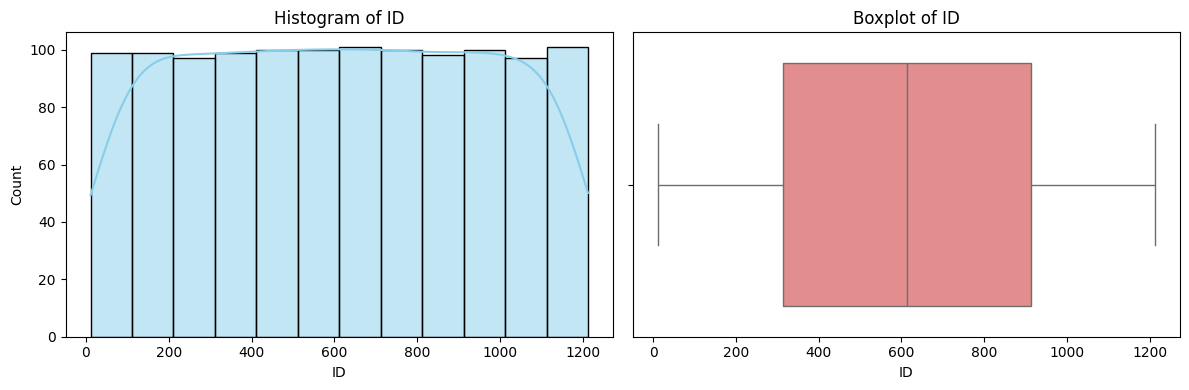

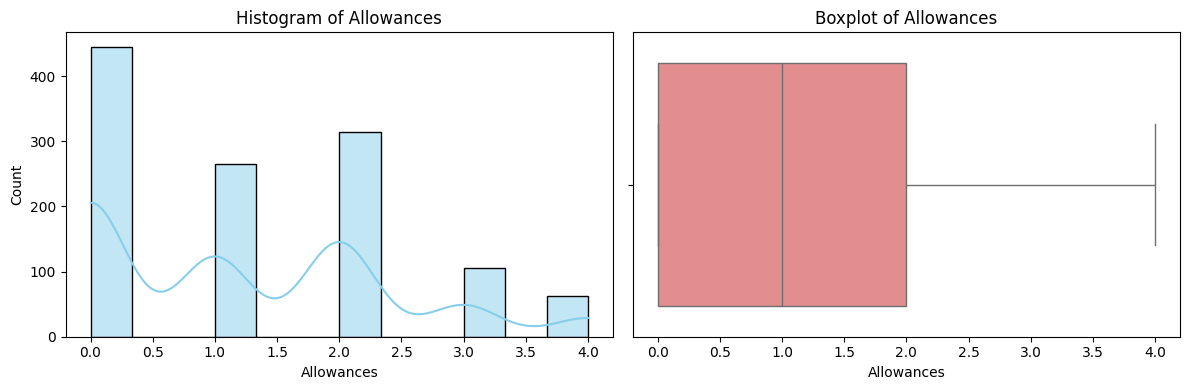

In [ ]:
quantitative_vars = ['ID','Allowances']

for col in quantitative_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {col}')

    sns.boxplot(x=df[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

## Analisis Fitur Kategorikal

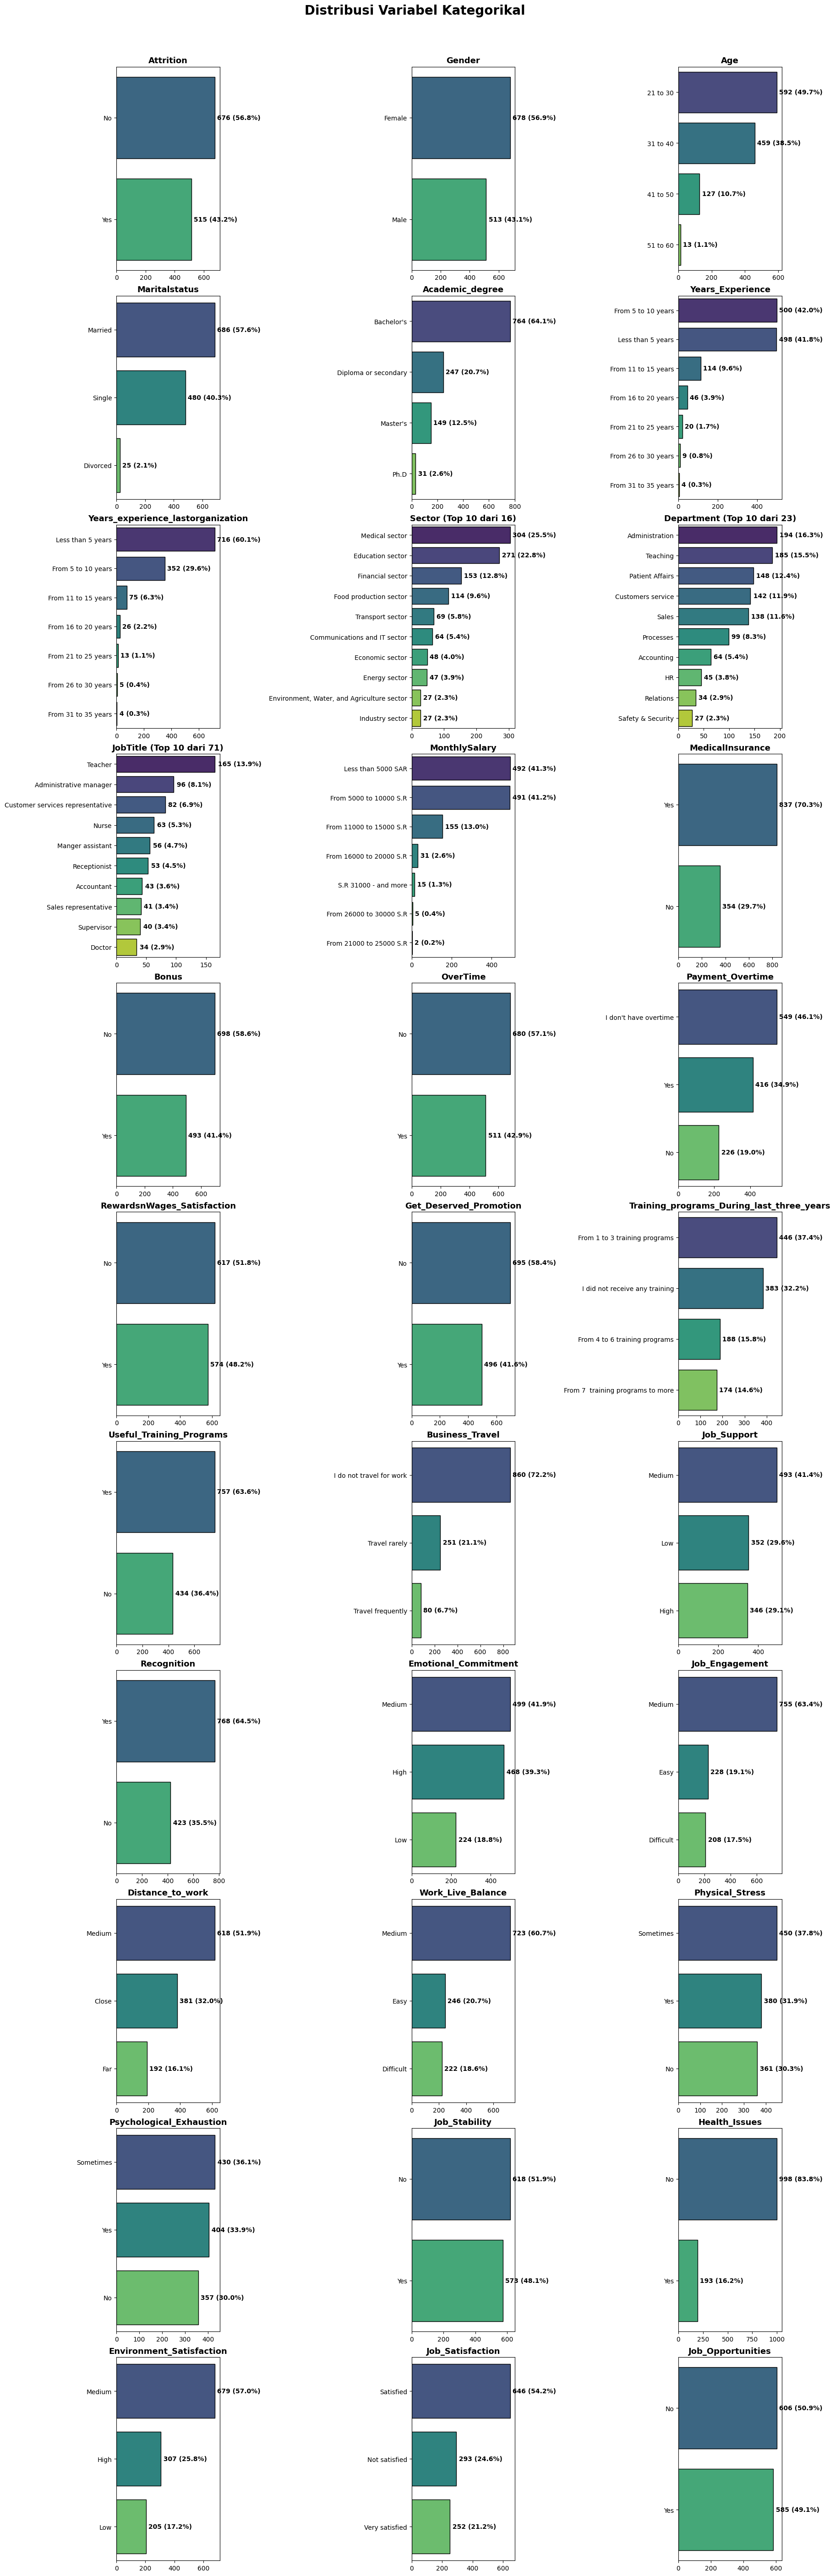

In [ ]:
def plot_all_categorical_grid(df, max_categories=10, cols_per_row=3):
    # Ambil semua kolom object (kategorikal)
    qualitative_vars = df.select_dtypes(include=['object']).columns

    n_plots = len(qualitative_vars)
    n_rows  = (n_plots + cols_per_row - 1) // cols_per_row

    fig, axes = plt.subplots(n_rows, cols_per_row,
                             figsize=(18, 5 * n_rows),
                             constrained_layout=True)
    axes = axes.flatten() if n_plots > 1 else [axes]

    for idx, col in enumerate(qualitative_vars):

        df[col] = df[col].str.strip()
        ax = axes[idx]

        # Hitung frekuensi (full)
        full_counts = df[col].value_counts()
        total_rows  = len(df)

        # Top N saja kalau terlalu banyak
        if len(full_counts) > max_categories:
            counts = full_counts.head(max_categories)
            title_suffix = f" (Top {max_categories} dari {len(full_counts)})";
        else:
            counts = full_counts
            title_suffix = ""

        percentages = (counts / total_rows * 100).round(1)

        # Horizontal bar = paling aman buat nama panjang
        sns.barplot(x=counts.values, y=counts.index, ax=ax, hue=counts.index, palette="viridis", legend=False, edgecolor="black", linewidth=1)

        # Label Count + % di ujung bar
        for i, (cat, cnt) in enumerate(counts.items()):
            pct = percentages[cat]
            ax.text(cnt + total_rows*0.001, i, f' {cnt:,} ({pct}%) ',
                    va='center', fontsize=10, fontweight='bold', color='black')

        ax.set_title(f"{col}{title_suffix}", fontsize=13, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Hapus subplot yang tidak terpakai
    for j in range(idx+1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle('Distribusi Variabel Kategorikal',
                 fontsize=20, fontweight='bold', y=1.02)
    plt.show()

# PANGGIL SEKALI AJA – SEMUA SELESAI!
plot_all_categorical_grid(df, max_categories=10, cols_per_row=3)

In [ ]:
qualitative_vars = df.select_dtypes(include=['object']).columns
for col in qualitative_vars:
    print(f"\n--- {col} ---")
    value_counts = df[col].value_counts()
    value_percentages = df[col].value_counts(normalize=True) * 100

    analysis_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_percentages.round(2)
    })

    print(analysis_df)
    print(f"Unique values: {df[col].nunique()}")
    print(f"Most common: {value_counts.index[0]} ({value_counts.iloc[0]} occurrences, {value_percentages.iloc[0]:.2f}%)")



--- Attrition ---
           Count  Percentage
Attrition                   
No           676       56.76
Yes          515       43.24
Unique values: 2
Most common: No (676 occurrences, 56.76%)

--- Gender ---
        Count  Percentage
Gender                   
Female    678       56.93
Male      513       43.07
Unique values: 2
Most common: Female (678 occurrences, 56.93%)

--- Age ---
          Count  Percentage
Age                        
21 to 30    592       49.71
31 to 40    459       38.54
41 to 50    127       10.66
51 to 60     13        1.09
Unique values: 4
Most common: 21 to 30 (592 occurrences, 49.71%)

--- Maritalstatus ---
               Count  Percentage
Maritalstatus                   
Married          686        57.6
Single           480        40.3
Divorced          25         2.1
Unique values: 3
Most common: Married (686 occurrences, 57.60%)

--- Academic_degree ---
                      Count  Percentage
Academic_degree                        
Bachelor's          

## Atrition Rate

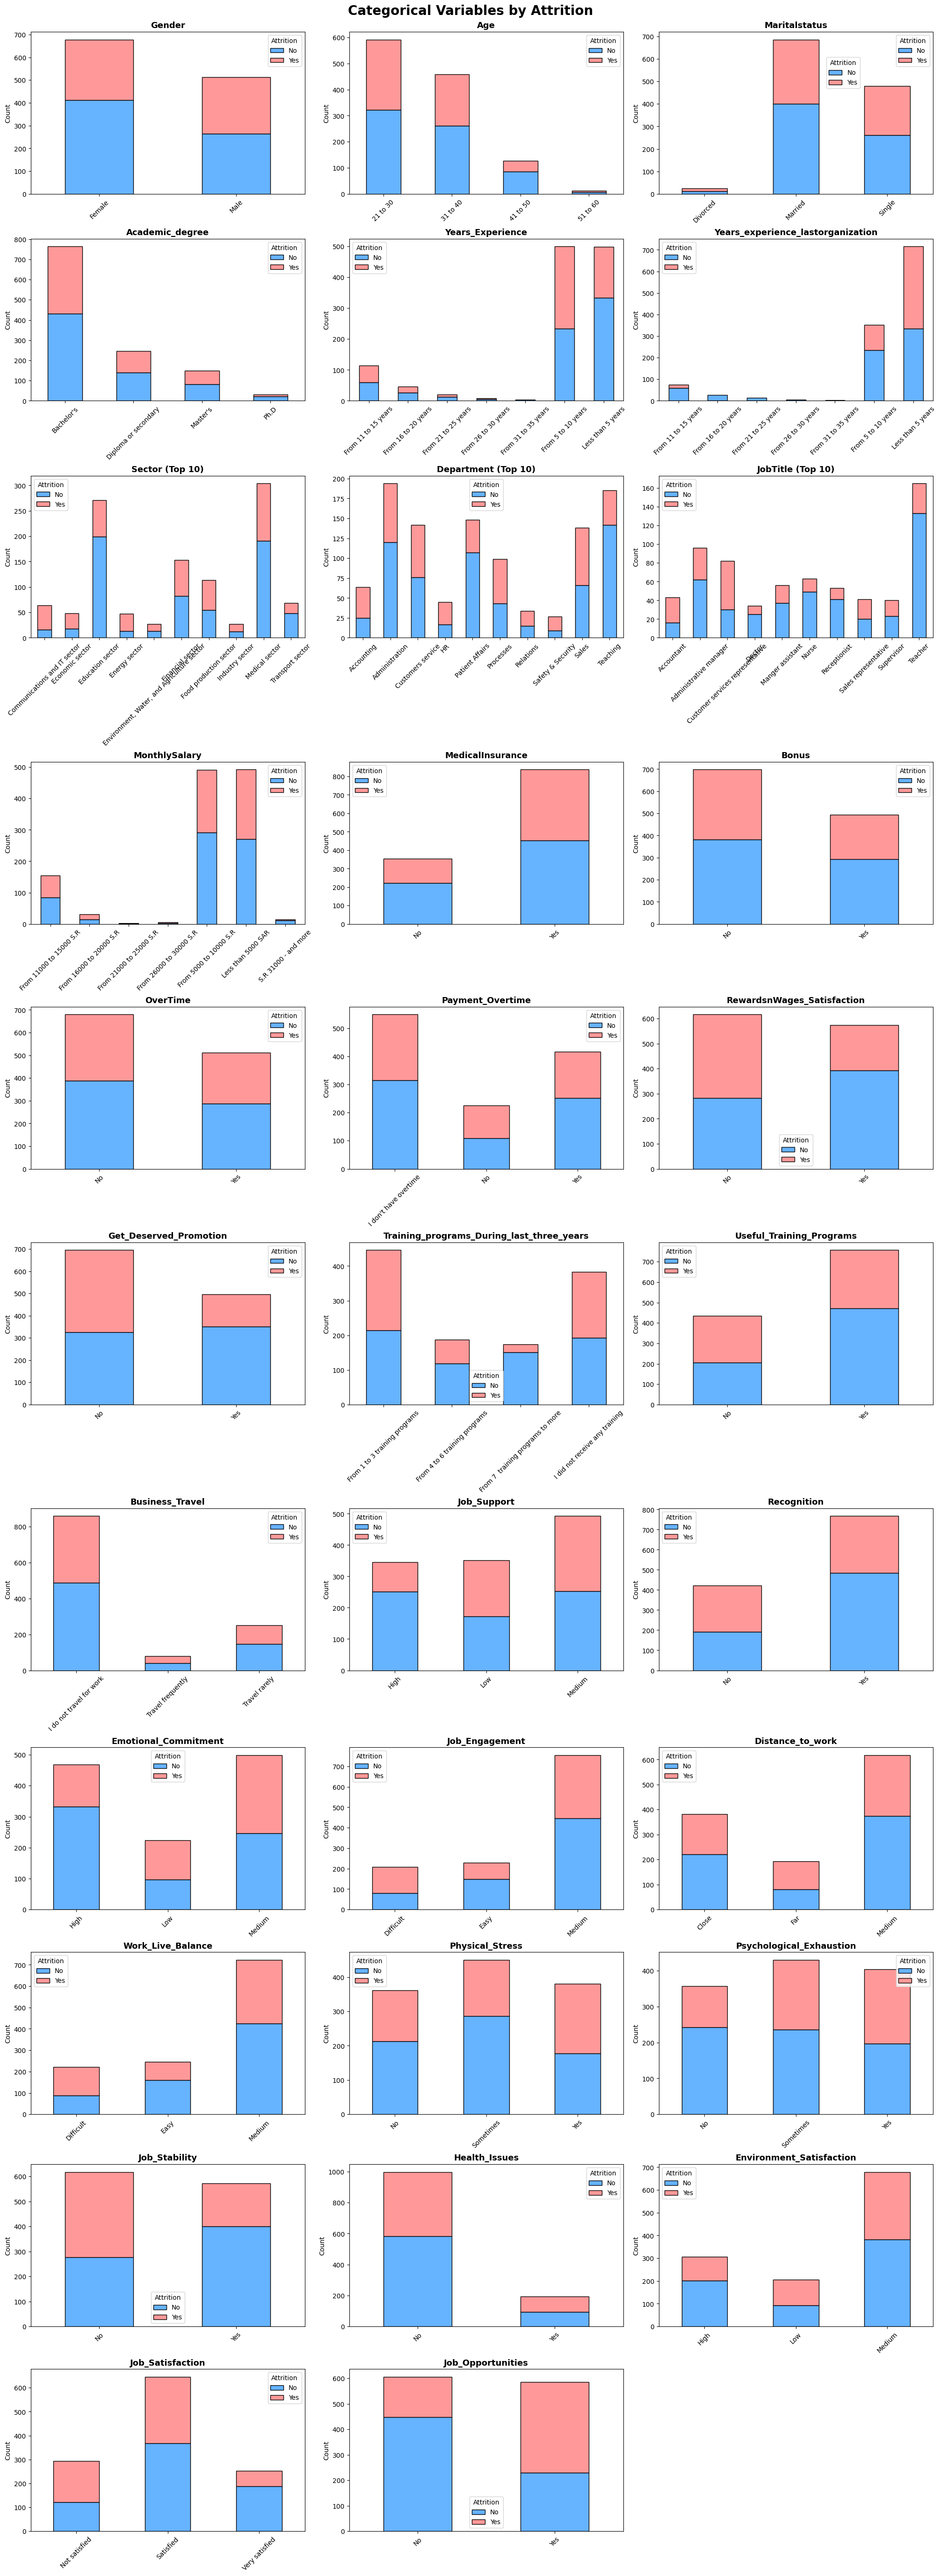

In [ ]:
def plot_categorical_by_attrition(df, max_categories=10, cols_per_row=3):
    qualitative_vars = df.select_dtypes(include=['object']).columns
    qualitative_vars = [col for col in qualitative_vars if col.lower() != "attrition"]

    n_plots = len(qualitative_vars)
    n_rows = (n_plots + cols_per_row - 1) // cols_per_row

    fig, axes = plt.subplots(
        n_rows, cols_per_row,
        figsize=(20, 5 * n_rows),
        constrained_layout=True
    )
    axes = axes.flatten()

    for idx, col in enumerate(qualitative_vars):
        ax = axes[idx]

        full_counts = df[col].value_counts()

        if len(full_counts) > max_categories:
            top_categories = full_counts.head(max_categories).index
            sub_df = df[df[col].isin(top_categories)]
            suffix = f" (Top {max_categories})"
        else:
            top_categories = full_counts.index
            sub_df = df
            suffix = ""

        ct = pd.crosstab(sub_df[col], sub_df["Attrition"])

        ct.plot(
            kind="bar", stacked=True, ax=ax,
            color=['#66b3ff', '#ff9999'], edgecolor='black'
        )

        ax.set_title(f"{col}{suffix}", fontsize=13, fontweight='bold')
        ax.set_xlabel("")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=45)

    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    # Legend global
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title="Attrition", bbox_to_anchor=(0.92, 0.98))

    fig.suptitle("Categorical Variables by Attrition", fontsize=20, fontweight="bold")
    plt.show()

plot_categorical_by_attrition(df)

In [ ]:
def print_categorical_attrition_stats(df, max_categories=10):
    qualitative_vars = df.select_dtypes(include=['object']).columns
    qualitative_vars = [col for col in qualitative_vars if col.lower() != "attrition"]

    for col in qualitative_vars:
        full_counts = df[col].value_counts()

        # Top N kategori
        if len(full_counts) > max_categories:
            selected = full_counts.head(max_categories).index
            sub_df = df[df[col].isin(selected)]
            suffix = f" (Top {max_categories})"
        else:
            sub_df = df
            suffix = ""

        # Crosstab by Attrition → Yes/No
        ct = pd.crosstab(sub_df[col], sub_df["Attrition"])

        # Hanya tampilkan tabel "per kategori", bukan per kolom
        for category in ct.index:
            counts = ct.loc[category]
            total = counts.sum()
            percentages = (counts / total * 100).round(2)

            # Gabungkan count + persentase
            table = pd.DataFrame({
                "Count": counts,
                "Percentage": percentages
            })

            print(f"\n--- {col}: {category}{suffix} ---")
            print(table)
        print("\n" + "="*70)


print_categorical_attrition_stats(df)


--- Gender: Female ---
           Count  Percentage
Attrition                   
No           412       60.77
Yes          266       39.23

--- Gender: Male ---
           Count  Percentage
Attrition                   
No           264       51.46
Yes          249       48.54


--- Age: 21 to 30 ---
           Count  Percentage
Attrition                   
No           323       54.56
Yes          269       45.44

--- Age: 31 to 40 ---
           Count  Percentage
Attrition                   
No           261       56.86
Yes          198       43.14

--- Age: 41 to 50 ---
           Count  Percentage
Attrition                   
No            85       66.93
Yes           42       33.07

--- Age: 51 to 60 ---
           Count  Percentage
Attrition                   
No             7       53.85
Yes            6       46.15


--- Maritalstatus: Divorced ---
           Count  Percentage
Attrition                   
No            13        52.0
Yes           12        48.0

--- Maritalsta

## Correlation Analysis

Attrition_encoded    0
OverTime_encoded     0
dtype: int64


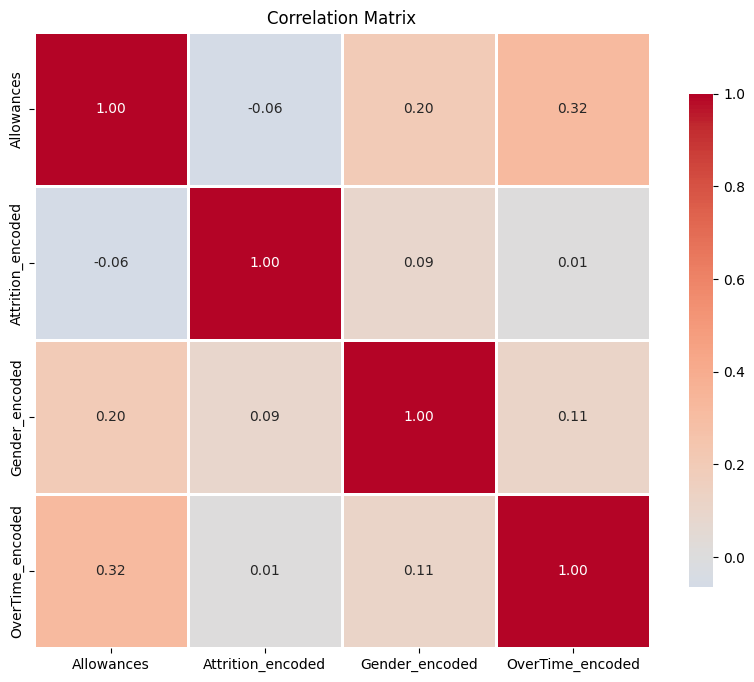

In [ ]:

df_corr = df.copy()

df_corr['Attrition_encoded'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df_corr['OverTime_encoded']  = df['OverTime'].map({'Yes': 1, 'No': 0})
df_corr['Gender_encoded']    = df['Gender'].map({'Male': 1, 'Female': 0})


print(df_corr[['Attrition_encoded', 'OverTime_encoded']].isna().sum())
corr_matrix = df_corr[['Allowances', 'Attrition_encoded', 'Gender_encoded', 'OverTime_encoded']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

## Nominal Binary Variables

In [ ]:
df_encoded = df.copy()

Nominal Binary Variables with Yes, No:

1. Job Opportunities
2. Job Stability
3. Health Issues
4. Recognition
5. Useful Training Programs
6. Get Deserved Promotion
7. Rewards Wages Satisfaction
8. Over Time
9. Bonus
10. Medical Insurance
11. Attrition
12. Gender (Male: 1, Female: 0)


In [ ]:
df_encoded.columns.tolist()

['ID',
 'Attrition',
 'Gender',
 'Age',
 'Maritalstatus',
 'Academic_degree',
 'Years_Experience',
 'Years_experience_lastorganization',
 'Sector',
 'Department',
 'JobTitle',
 'MonthlySalary',
 'Allowances',
 'MedicalInsurance',
 'Bonus',
 'OverTime',
 'Payment_Overtime',
 'RewardsnWages_Satisfaction',
 'Get_Deserved_Promotion',
 'Training_programs_During_last_three_years',
 'Useful_Training_Programs',
 'Business_Travel',
 'Job_Support',
 'Recognition',
 'Emotional_Commitment',
 'Job_Engagement',
 'Distance_to_work',
 'Work_Live_Balance',
 'Physical_Stress',
 'Psychological_Exhaustion',
 'Job_Stability',
 'Health_Issues',
 'Environment_Satisfaction',
 'Job_Satisfaction',
 'Job_Opportunities']

In [ ]:
binary_cols = [
    "Job_Opportunities",
    "Job_Stability",
    "Health_Issues",
    "Recognition",
    "Useful_Training_Programs",
    "Get_Deserved_Promotion",
    "RewardsnWages_Satisfaction",
    "OverTime",
    "Bonus",
    "MedicalInsurance",
    "Attrition"
]

binary_map = {"No": 0, "Yes": 1}

df_before = df_encoded.copy()

print("Before encoding (unique values)")
for col in binary_cols:
    print(f"{col}: {df_encoded[col].unique()}")

for col in binary_cols:
    df_encoded[col] = (
        df_encoded[col]
        .astype(str)
        .str.strip()
        .str.title()
        .map(binary_map)
    )

print("\nAfter encoding (unique values)")
for col in binary_cols:
    print(f"{col}: {df_encoded[col].unique()}")


Before encoding (unique values)
Job_Opportunities: ['Yes' 'No']
Job_Stability: ['No' 'Yes']
Health_Issues: ['Yes' 'No']
Recognition: ['No' 'Yes']
Useful_Training_Programs: ['Yes' 'No']
Get_Deserved_Promotion: ['Yes' 'No']
RewardsnWages_Satisfaction: ['Yes' 'No']
OverTime: ['No' 'Yes']
Bonus: ['No' 'Yes']
MedicalInsurance: ['No' 'Yes']
Attrition: ['Yes' 'No']

After encoding (unique values)
Job_Opportunities: [1 0]
Job_Stability: [0 1]
Health_Issues: [1 0]
Recognition: [0 1]
Useful_Training_Programs: [1 0]
Get_Deserved_Promotion: [1 0]
RewardsnWages_Satisfaction: [1 0]
OverTime: [0 1]
Bonus: [0 1]
MedicalInsurance: [0 1]
Attrition: [1 0]


In [ ]:
gender_map = {"Male": 1, "Female": 0}

gender_before = df_before["Gender"].unique()

df_encoded["Gender"] = (
    df_encoded["Gender"]
    .astype(str)
    .str.strip()
    .str.title()
    .map(gender_map)
)

gender_after = df_encoded["Gender"].unique()

print("Before encoding Gender:", gender_before)
print("After encoding Gender:", gender_after)


Before encoding Gender: ['Female' 'Male']
After encoding Gender: [0 1]


In [ ]:
df_base = df_encoded.copy()


### Ordinal Variables

1. `Job Satisfaction`

|  |  |
| ---------------- | ---- |
| Not satisfied    | 0    |
| Satisfied        | 1    |
| Very satisfied   | 2    |

<br>

2. `Environment_Satisfaction`, `Emotional_Commitment`, `Job_Support`

|  |  |
| ---------------- | ---- |
| Low           | 0    |
| Medium        | 1    |
| High          | 2    |
<br>

3. `Psychological_Exhaustion`, `Physical_Stress`

<br>

|  |  |
| ---------------- | ---- |
| No           | 0    |
| Sometime        | 1    |
| Yes          | 2    |
<br>

4. `Work_Live_Balance` , `Job_Engagement`

|  |  |
| ---------------- | ---- |
| Easy           | 0    |
| Medium        | 1    |
| Difficult          | 2    |
<br>

5. `Distance_to_work`

|  |  |
| ---------------- | ---- |
| Close          | 0    |
| Medium        | 1    |
| Far          | 2    |
<br>

6. `Business Travel`

|  |  |
| ---------------- | ---- |
| No Trabel           | 0    |
| Rarely        | 1    |
| Frequently          | 2    |
<br>

7. `Training_programs_During_last_three_years`

|   | |
| ------------ | ---- |
| No trainings | 0    |
| 1 – 3        | 1    |
| 4 – 6        | 2    |
| 7 – more     | 3    |
<br>

8. `Payment_Overtime`

|   |  |
| ----------- | ---- |
| No Overtime | 0    |
| No          | 1    |
| Yes         | 2    |
<br>

9.` MonthlySalary `

|| |
| ------------ | ---- |
| 1k – 5k      | 0    |
| 6k – 10k     | 1    |
| 11k – 15k    | 2    |
| 16k – more   | 3    |

<br>

10. `Years_experience_lastorganization, Years_Experience`


 |  |  |
| ------------------ | ---- |
| 1 – 5              | 0    |
| 6 – 10             | 1    |
| 11 – more          | 2    |
<br>

11. `Academic_degree`

|         | |
| -------------------- | ---- |
| Diploma or Secondary | 0    |
| Bachelor             | 1    |
| Master               | 2    |
| Ph.D.                | 3    |

<br>

12. `Age`

|      |  |
| --------- | ---- |
| 21 – 30   | 0    |
| 31 – 40   | 1    |
| 41 – more | 2    |




In [ ]:
ordinal_maps = {
    "Job_Satisfaction": {
        "not Satisfied": 0, "satisfied": 1, "very satisfied": 2
    },

    "Environment_Satisfaction": {
        "low": 0, "medium": 1, "high": 2
    },

    "Emotional_Commitment": {
        "low": 0, "medium": 1, "high": 2
    },

    "Job_Support": {
        "low": 0, "Medium": 1, "High": 2
    },

    "Psychological_Exhaustion": {
        "No": 0, "Sometimes": 1, "Yes": 2
    },

    "Physical_Stress": {
        "No": 0, "Sometimes": 1, "Yes": 2
    },

    "Work_Live_Balance": {
        "Easy": 0, "Medium": 1, "Difficult": 2
    },

    "Job_Engagement": {
        "Easy": 0, "Medium": 1, "Difficult": 2
    },

    "Distance_to_work": {
        "Close": 0, "Medium": 1, "Far": 2
    },

    "Business_Travel": {
        "I Do Not Travel For Work": 0, "Travel Rarely": 1, "Travel Frequently": 2
    },

    "Training_programs_During_last_three_years": {
        "I Did Not Receive Any Training": 0,
        "From 1 To 3 Training Programs": 1,
        "From 4 To 6 Training Programs": 2,
        "From 7  Training Programs To More": 3
    },

    "Payment_Overtime": {
        "I Don't Have Overtime": 0, "No": 1, "Yes": 2
    },

    "MonthlySalary": {
        "Less Than 5000 Sar": 0,
        "From 5000 To 10000 S.R": 1,
        "From 11000 To 15000 S.R": 2,
        "From 16000 To 20000 S.R": 3,
        "From 21000 To 25000 S.R": 3,
        "From 26000 To 30000 S.R": 3,
        "S.R 31000 - And More": 3
    },

    "Years_Experience": {
        "Less Than 5 Years": 0,
        "From 5 To 10 Years": 1,
        "From 11 To 15 Years": 2,
        "From 16 To 20 Years": 2,
        "From 21 To 25 Years": 2,
        "From 26 To 30 Years": 2,
        "From 31 To 35 Years": 2
    },

    "Years_experience_lastorganization": {
        "Less Than 5 Years": 0,
        "From 5 To 10 Years": 1,
        "From 11 To 15 Years": 2,
        "From 16 To 20 Years": 2,
        "From 21 To 25 Years": 2,
        "From 26 To 30 Years": 2,
        "From 31 To 35 Years": 2
    },

    "Academic_degree": {
        "Diploma Or Secondary": 0,
        "Bachelor'S": 1,
        "Master'S": 2,
        "Ph.D": 3
    },

    "Age": {
        "21 To 30": 0,
        "31 To 40": 1,
        "41 To 50": 2,
        "51 To 60": 2
    }
}


In [ ]:
cols_to_normalize = list(ordinal_maps.keys())

for col in cols_to_normalize:
    df_base[col] = (
        df_base[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .str.replace(" +", " ", regex=True)   # hilangkan double spaces
    )


In [ ]:
for col, mapping in ordinal_maps.items():
    df_base[col] = (
        df_base[col]
        .astype(str)
        .str.strip()
        .str.title()
        .map(mapping)
    )


### Category grouping

A. Marital Status

In [ ]:
df_base["Maritalstatus"] = (
    df_base["Maritalstatus"]
    .astype(str).str.strip().str.title()
)

marital_map = {
    "Married": "Married",
    "Single": "Single",
    "Divorced": "Single"
}

df_base["Maritalstatus"] = df_base["Maritalstatus"].map(marital_map)


B. Sector

In [ ]:
df_base["Sector"] = (
    df_base["Sector"]
    .astype(str).str.strip().str.title()
)

sector_map = {
    "Financial Sector": "Financial",
    "Food Production Sector": "Food",
    "Medical Sector": "Medical"
}

df_base["Sector"] = df_base["Sector"].apply(
    lambda x: sector_map[x] if x in sector_map else "Other"
)


C. Departemen

In [ ]:
df_base["Department"] = (
    df_base["Department"]
    .astype(str).str.strip().str.title()
)

dept_map = {
    "Administration": "Administration",
    "Hr": "Administration",
    "Customers Service": "Customer Service",
    "Customer Service": "Customer Service",
    "Patient Affairs": "Patient Affairs",
    "Processes": "Processes",
    "Sales": "Sales",
    "Teaching": "Teaching"
}

df_base["Department"] = df_base["Department"].apply(
    lambda x: dept_map[x] if x in dept_map else "Other"
)


## One-HotEncoder (OHE)
Nominal Multi value Variables:

Pada dataset ***Saudia Attrition***, terdapat beberapa variabel kategorikall yang memiliki banyak kategori dan tidak ada urutan (*Nominal Multi value)*, contohnya pada `Marital Status` terdapat kategori Married, Single, Divorced.<br><br>
Setiap kategori tersebut dikonversi menggunakan One-Hot Encoding (OHE), menjadi kolom biner dengan nilai 0 atau 1. Nilai 1 berarti kategori tersebut aktif pada baris tersebut, sedangkan nilai 0 berarti tidak aktif.

Contoh:

Sebelum encoding:

**Sebelum encoding:**

| Marital Status |
|----------------|
| Married        |
| Single         |
| Divorced       |

**Sesudah encoding:**

| Married | Single | Divorced |
|---------|--------|----------|
| 1       | 0      | 0        |
| 0       | 1      | 0        |
| 0       | 0      | 1        |  



1. **`Marital Status`**:
- Married
- Single
- Divorced

2. **`Sector`**:

- Medical
- Education
- Other
- Financial
- Food


3. **`Department `**

- Accounting
- Teaching
- Other Administration
- Processes
- Customer Service
- Sales
- Patient Affairs



In [ ]:
df_non_tree = pd.get_dummies(
    df_base.copy(),
    columns=["Maritalstatus", "Sector", "Department"],
    drop_first=False
)

df_non_tree.shape




(1191, 45)

In [ ]:
df_non_tree.columns.tolist()

['ID',
 'Attrition',
 'Gender',
 'Age',
 'Academic_degree',
 'Years_Experience',
 'Years_experience_lastorganization',
 'JobTitle',
 'MonthlySalary',
 'Allowances',
 'MedicalInsurance',
 'Bonus',
 'OverTime',
 'Payment_Overtime',
 'RewardsnWages_Satisfaction',
 'Get_Deserved_Promotion',
 'Training_programs_During_last_three_years',
 'Useful_Training_Programs',
 'Business_Travel',
 'Job_Support',
 'Recognition',
 'Emotional_Commitment',
 'Job_Engagement',
 'Distance_to_work',
 'Work_Live_Balance',
 'Physical_Stress',
 'Psychological_Exhaustion',
 'Job_Stability',
 'Health_Issues',
 'Environment_Satisfaction',
 'Job_Satisfaction',
 'Job_Opportunities',
 'Maritalstatus_Married',
 'Maritalstatus_Single',
 'Sector_Financial',
 'Sector_Food',
 'Sector_Medical',
 'Sector_Other',
 'Department_Administration',
 'Department_Customer Service',
 'Department_Other',
 'Department_Patient Affairs',
 'Department_Processes',
 'Department_Sales',
 'Department_Teaching']

## Dataset Non-Tree

In [ ]:
print("df_non_tree shape:", df_non_tree.shape)
df_non_tree.head()


df_non_tree shape: (1191, 45)


,ID,Attrition,Gender,Age,Academic_degree,Years_Experience,Years_experience_lastorganization,JobTitle,MonthlySalary,Allowances,...,Sector_Food,Sector_Medical,Sector_Other,Department_Administration,Department_Customer Service,Department_Other,Department_Patient Affairs,Department_Processes,Department_Sales,Department_Teaching
0,11,1,0,1,2,0,0,Accountant,1,2,...,False,True,False,False,False,True,False,False,False,False
1,12,0,0,0,2,0,0,Accountant,2,2,...,False,True,False,False,False,True,False,False,False,False
2,13,0,0,0,1,0,0,Teacher,0,0,...,False,False,True,False,False,False,False,False,False,True
3,14,0,0,0,1,0,0,Teacher,0,0,...,False,False,True,False,False,False,False,False,False,True
4,15,0,0,0,1,0,0,Teacher,0,0,...,False,False,True,False,False,False,False,False,False,True


### MEstimateEncoder
**Nominal Many Value Variables:** <br>



Variabel `Job Title` memiliki jumlah kategori yang sangat banyak *(hight cardinality)*, sehingga tidak dapat dilakukan encoding dengan OHE karena jumlah kolom akan bertambah banyak.

<br>

`MEstimateEncoder` merupakah salah satu metode Target Encoding yang mengubah setiap kategori menjadi satu nilai numerik yang merepresentasikan kecenderungan kategori tersebut terhadap kelas target.

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import MEstimateEncoder

df_tree = df_base.copy()

df_tree = df_tree.rename(columns={"JobTitle": "Jobtitle"})

nominal_for_m = ["Maritalstatus", "Sector", "Department", "Jobtitle"]

y = df_tree["Attrition"]

mencoder = MEstimateEncoder(cols=nominal_for_m, m=1)
df_tree[nominal_for_m] = mencoder.fit_transform(df_tree[nominal_for_m], y)

print("df_tree shape:", df_tree.shape)
df_tree.head()




df_tree shape: (1191, 35)


,ID,Attrition,Gender,Age,Maritalstatus,Academic_degree,Years_Experience,Years_experience_lastorganization,Sector,Department,...,Job_Engagement,Distance_to_work,Work_Live_Balance,Physical_Stress,Psychological_Exhaustion,Job_Stability,Health_Issues,Environment_Satisfaction,Job_Satisfaction,Job_Opportunities
0,11,1,0,1,0.415477,2,0,0,0.37191,0.571445,...,1,1,1,2,0,0,1,NaN,NaN,1
1,12,0,0,0,0.455400,2,0,0,0.37191,0.571445,...,1,1,1,0,0,1,0,NaN,NaN,0
2,13,0,0,0,0.455400,1,0,0,0.43870,0.233508,...,1,0,1,2,1,0,0,NaN,NaN,1
3,14,0,0,0,0.455400,1,0,0,0.43870,0.233508,...,1,1,1,2,2,0,0,NaN,NaN,0
4,15,0,0,0,0.455400,1,0,0,0.43870,0.233508,...,1,1,1,1,1,0,0,NaN,NaN,0


In [ ]:
df_non_tree = df_non_tree.drop(columns=["ID"])
df_tree = df_tree.drop(columns=["ID"])


In [ ]:
print("BASE    :", df_base.shape)
print("NON-TREE:", df_non_tree.shape)
print("TREE    :", df_tree.shape)


BASE    : (1191, 35)
NON-TREE: (1191, 44)
TREE    : (1191, 34)


## Numerical Columns

`Allowances`

## From Saudia Dataset

In [ ]:
# Tree model
df_tree_sd = pd.read_excel("/content/drive/MyDrive/dataset-saudia/Employee attrition dataset for tree-based models.xlsx")

# Non Tree model
df_non_tree_sd = pd.read_excel("/content/drive/MyDrive/dataset-saudia/Employee attrition dataset for non-tree-based models.xlsx")

### Tree Based Model

In [ ]:
print("Original    :", df.shape)
print("NON-TREE:", df_non_tree_sd.shape)
print("TREE    :", df_tree_sd.shape)


Original    : (1191, 35)
NON-TREE: (1174, 44)
TREE    : (1174, 34)


In [ ]:
df.columns.tolist()

['ID',
 'Attrition',
 'Gender',
 'Age',
 'Maritalstatus',
 'Academic_degree',
 'Years_Experience',
 'Years_experience_lastorganization',
 'Sector',
 'Department',
 'JobTitle',
 'MonthlySalary',
 'Allowances',
 'MedicalInsurance',
 'Bonus',
 'OverTime',
 'Payment_Overtime',
 'RewardsnWages_Satisfaction',
 'Get_Deserved_Promotion',
 'Training_programs_During_last_three_years',
 'Useful_Training_Programs',
 'Business_Travel',
 'Job_Support',
 'Recognition',
 'Emotional_Commitment',
 'Job_Engagement',
 'Distance_to_work',
 'Work_Live_Balance',
 'Physical_Stress',
 'Psychological_Exhaustion',
 'Job_Stability',
 'Health_Issues',
 'Environment_Satisfaction',
 'Job_Satisfaction',
 'Job_Opportunities']

In [ ]:
df_non_tree_sd.columns.tolist()

['Attrition',
 'Gender',
 'Age',
 'Academic_degree',
 'Years_Experience',
 'Years_experience_lastorganization',
 'JobTitle',
 'MonthlySalary',
 'Allowances',
 'MedicalInsurance',
 'Bonus',
 'OverTime',
 'Payment_Overtime',
 'Rewards_Wages_Satisfaction',
 'Get_Deserved_Promotion',
 'Training_programs_During_last_three_years',
 'Useful_Training_Programs',
 'Business_Travel',
 'Job_Support',
 'Recognition',
 'Emotional_Commitment',
 'Job_Engagement',
 'Distance_to_work',
 'Work_Live_Balance',
 'Physical_Stress',
 'Psychological_Exhaustion',
 'Job_Stability',
 'Health_Issues',
 'Environment_Satisfaction',
 'Job_Satisfaction',
 'Job_Opportunities',
 'Maritalstatus_Married',
 'Maritalstatus_Single',
 'Sector_Financial',
 'Sector_Food',
 'Sector_Medical',
 'Sector_Other',
 'Department_Administration',
 'Department_Customer Service',
 'Department_Other',
 'Department_Patient Affairs',
 'Department_Processes',
 'Department_Sales',
 'Department_Teaching']

In [ ]:
df_tree_sd.head(10)

,Attrition,Gender,Age,Maritalstatus,Academic_degree,Years_Experience,Years_experience_lastorganization,Sector,Department,JobTitle,...,Job_Engagement,Distance_to_work,Work_Live_Balance,Physical_Stress,Psychological_Exhaustion,Job_Stability,Health_Issues,Environment_Satisfaction,Job_Satisfaction,Job_Opportunities
0,1,0,1,0.405953,2,0,0,0.359278,0.600378,0.623277,...,1,1,1,2,0,0,1,1,0,1
1,0,0,0,0.447209,2,0,0,0.359278,0.600378,0.623277,...,1,1,1,0,0,1,0,1,1,0
2,0,0,0,0.447209,1,0,0,0.260830,0.229320,0.190450,...,1,0,1,2,1,0,0,1,1,1
3,0,0,0,0.447209,1,0,0,0.260830,0.229320,0.190450,...,1,1,1,2,2,0,0,0,0,0
4,0,0,0,0.447209,1,0,0,0.260830,0.229320,0.190450,...,1,1,1,1,1,0,0,1,0,0
5,0,0,0,0.447209,1,0,0,0.260830,0.229320,0.190450,...,1,0,1,2,2,0,0,0,0,1
6,1,0,1,0.405953,1,0,0,0.260830,0.229320,0.190450,...,1,0,2,2,2,0,0,1,1,0
7,0,0,1,0.405953,1,1,1,0.260830,0.229320,0.190450,...,1,1,1,1,1,1,0,1,2,1
8,1,0,1,0.405953,2,1,0,0.260830,0.229320,0.190450,...,1,1,2,2,2,0,0,1,1,0
9,1,0,0,0.405953,1,0,0,0.565187,0.556474,0.686866,...,2,2,2,2,2,1,1,2,2,1


In [ ]:
df_tree.dtypes

,0
Attrition,int64
Gender,int64
Age,int64
Maritalstatus,float64
Academic_degree,int64
Years_Experience,int64
Years_experience_lastorganization,int64
Sector,float64
Department,float64
Jobtitle,float64


In [ ]:
df_non_tree_sd.head(10)

,Attrition,Gender,Age,Academic_degree,Years_Experience,Years_experience_lastorganization,JobTitle,MonthlySalary,Allowances,MedicalInsurance,...,Sector_Food,Sector_Medical,Sector_Other,Department_Administration,Department_Customer Service,Department_Other,Department_Patient Affairs,Department_Processes,Department_Sales,Department_Teaching
0,1,0,1,2,0,0,0.623277,1,2,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0.623277,2,2,1,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0.190450,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0.190450,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0.190450,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0.190450,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,1,1,0,0,0.190450,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,1,1,1,1,0.190450,2,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1,0,1,2,1,0,0.190450,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,0,1,0,0,0.686866,0,1,1,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
df_non_tree.head(10)

,Attrition,Gender,Age,Academic_degree,Years_Experience,Years_experience_lastorganization,JobTitle,MonthlySalary,Allowances,MedicalInsurance,...,Sector_Food,Sector_Medical,Sector_Other,Department_Administration,Department_Customer Service,Department_Other,Department_Patient Affairs,Department_Processes,Department_Sales,Department_Teaching
0,1,0,1,2,0,0,Accountant,1,2,0,...,False,True,False,False,False,True,False,False,False,False
1,0,0,0,2,0,0,Accountant,2,2,1,...,False,True,False,False,False,True,False,False,False,False
2,0,0,0,1,0,0,Teacher,0,0,0,...,False,False,True,False,False,False,False,False,False,True
3,0,0,0,1,0,0,Teacher,0,0,0,...,False,False,True,False,False,False,False,False,False,True
4,0,0,0,1,0,0,Teacher,0,0,0,...,False,False,True,False,False,False,False,False,False,True
5,0,0,0,1,0,0,Teacher,0,0,0,...,False,False,True,False,False,False,False,False,False,True
6,1,0,1,1,0,0,Teacher,0,0,0,...,False,False,True,False,False,False,False,False,False,True
7,0,0,1,1,1,1,Teacher,2,0,0,...,False,False,True,False,False,False,False,False,False,True
8,1,0,1,2,1,0,Teacher,0,0,0,...,False,False,True,False,False,False,False,False,False,True
9,1,0,0,1,0,0,Relationships Specialist,0,1,1,...,False,False,True,False,False,True,False,False,False,False


In [ ]:
df_non_tree_sd.columns.tolist()


['Attrition',
 'Gender',
 'Age',
 'Academic_degree',
 'Years_Experience',
 'Years_experience_lastorganization',
 'JobTitle',
 'MonthlySalary',
 'Allowances',
 'MedicalInsurance',
 'Bonus',
 'OverTime',
 'Payment_Overtime',
 'Rewards_Wages_Satisfaction',
 'Get_Deserved_Promotion',
 'Training_programs_During_last_three_years',
 'Useful_Training_Programs',
 'Business_Travel',
 'Job_Support',
 'Recognition',
 'Emotional_Commitment',
 'Job_Engagement',
 'Distance_to_work',
 'Work_Live_Balance',
 'Physical_Stress',
 'Psychological_Exhaustion',
 'Job_Stability',
 'Health_Issues',
 'Environment_Satisfaction',
 'Job_Satisfaction',
 'Job_Opportunities',
 'Maritalstatus_Married',
 'Maritalstatus_Single',
 'Sector_Financial',
 'Sector_Food',
 'Sector_Medical',
 'Sector_Other',
 'Department_Administration',
 'Department_Customer Service',
 'Department_Other',
 'Department_Patient Affairs',
 'Department_Processes',
 'Department_Sales',
 'Department_Teaching']

## Handling Imbalance

In [ ]:
def balance_with_ctgan(df, target_col='Attrition', random_state=42):
    # Pisahkan kelas mayoritas dan minoritas
    class_counts = df[target_col].value_counts()
    majority_class = class_counts.idxmax()
    minority_class = class_counts.idxmin()

    n_majority = class_counts[majority_class]
    n_minority = class_counts[minority_class]

    print(f"\nKelas Mayoritas ({majority_class}): {n_majority} samples")
    print(f"Kelas Minoritas ({minority_class}): {n_minority} samples")
    print(f"Perlu generate: {n_majority - n_minority} synthetic samples")

    # Ambil data kelas minoritas
    df_minority = df[df[target_col] == minority_class].copy()

    # Setup metadata untuk CTGAN
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(df_minority)

    # Inisialisasi CTGAN
    print("\nTraining CTGAN model...")
    synthesizer = CTGANSynthesizer(
        metadata,
        epochs=300,
        batch_size=500,
        generator_dim=(256, 256),
        discriminator_dim=(256, 256),
        generator_lr=2e-4,
        discriminator_lr=2e-4,
        verbose=True,
        cuda=True
    )

    # Train CTGAN dengan data minoritas
    synthesizer.fit(df_minority)

    # Generate synthetic samples
    n_synthetic = n_majority - n_minority
    print(f"\nGenerating {n_synthetic} synthetic samples...")
    synthetic_data = synthesizer.sample(num_rows=n_synthetic)

    # Pastikan target tetap minoritas class
    synthetic_data[target_col] = minority_class

    # Gabungkan dengan data asli
    df_balanced = pd.concat([df, synthetic_data], ignore_index=True)

    print("\nBalancing selesai!")
    return df_balanced

In [ ]:
# Terapkan CTGAN pada df_tree
df_tree_balanced = balance_with_ctgan(df_tree_sd, target_col='Attrition', random_state=42)


Kelas Mayoritas (0): 676 samples
Kelas Minoritas (1): 498 samples
Perlu generate: 178 synthetic samples

Training CTGAN model...


/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/ctgan/synthesizers/_utils.py:16: FutureWarning: `cuda` parameter is deprecated and will be removed in a future release. Please use `enable_gpu` instead.
  warnings.warn(
Gen. (-1.14) | Discrim. (0.13): 100%|██████████| 300/300 [00:50<00:00,  5.99it/s]



Generating 178 synthetic samples...

Balancing selesai!


In [ ]:
# Terapkan CTGAN pada df_non_tree
df_non_tree_balanced = balance_with_ctgan(df_non_tree_sd, target_col='Attrition', random_state=42)

/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/ctgan/synthesizers/_utils.py:16: FutureWarning: `cuda` parameter is deprecated and will be removed in a future release. Please use `enable_gpu` instead.
  warnings.warn(



Kelas Mayoritas (0): 676 samples
Kelas Minoritas (1): 498 samples
Perlu generate: 178 synthetic samples

Training CTGAN model...


Gen. (-0.68) | Discrim. (-0.17): 100%|██████████| 300/300 [00:44<00:00,  6.73it/s]



Generating 178 synthetic samples...

Balancing selesai!


df_tree

In [ ]:
print("Distribusi Attrition:")
print(df_tree_balanced['Attrition'].value_counts())
print("\nPersentase:")
print(df_tree_balanced['Attrition'].value_counts(normalize=True) * 100)

Distribusi Attrition:
Attrition
1    676
0    676
Name: count, dtype: int64

Persentase:
Attrition
1    50.0
0    50.0
Name: proportion, dtype: float64


df_non_tree

In [ ]:
print("Distribusi Attrition:")
print(df_non_tree_balanced['Attrition'].value_counts())
print("\nPersentase:")
print(df_non_tree_balanced['Attrition'].value_counts(normalize=True) * 100)

Distribusi Attrition:
Attrition
1    676
0    676
Name: count, dtype: int64

Persentase:
Attrition
1    50.0
0    50.0
Name: proportion, dtype: float64


# Model

## TRAIN-TEST SPLIT (Non Tree)

In [ ]:
X_non_tree = df_non_tree_balanced.drop(columns=['Attrition'])
y_non_tree = df_non_tree_balanced['Attrition']

In [ ]:
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(
    X_non_tree, y_non_tree, test_size=0.2, random_state=42, stratify=y_non_tree
)

In [ ]:
print(f"Training set: {X_train_nt.shape[0]} samples ({X_train_nt.shape[0]/len(X_non_tree)*100:.1f}%)")
print(f"Test set: {X_test_nt.shape[0]} samples ({X_test_nt.shape[0]/len(X_non_tree)*100:.1f}%)")
print(f"Features: {X_train_nt.shape[1]}")

Training set: 1081 samples (80.0%)
Test set: 271 samples (20.0%)
Features: 43


In [ ]:
print(f"   Training set:")
print(f"      No Attrition (0): {(y_train_nt == 0).sum()} ({(y_train_nt == 0).sum()/len(y_train_nt)*100:.1f}%)")
print(f"      Attrition (1): {(y_train_nt == 1).sum()} ({(y_train_nt == 1).sum()/len(y_train_nt)*100:.1f}%)")
print(f"   Test set:")
print(f"      No Attrition (0): {(y_test_nt == 0).sum()} ({(y_test_nt == 0).sum()/len(y_test_nt)*100:.1f}%)")
print(f"      Attrition (1): {(y_test_nt == 1).sum()} ({(y_test_nt == 1).sum()/len(y_test_nt)*100:.1f}%)")

   Training set:
      No Attrition (0): 540 (50.0%)
      Attrition (1): 541 (50.0%)
   Test set:
      No Attrition (0): 136 (50.2%)
      Attrition (1): 135 (49.8%)


## FEATURE SELECTION

In [ ]:
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train_nt, y_train_nt)
rf_importance = pd.DataFrame({
    'Feature': X_train_nt.columns,
    'Importance': rf_selector.feature_importances_
}).sort_values('Importance', ascending=False)

In [ ]:
rf_importance[['Feature', 'Importance']]

,Feature,Importance
5,JobTitle,0.178996
3,Years_Experience,0.056083
29,Job_Opportunities,0.053988
4,Years_experience_lastorganization,0.042760
14,Training_programs_During_last_three_years,0.036651
19,Emotional_Commitment,0.035564
7,Allowances,0.029988
25,Job_Stability,0.028416
28,Job_Satisfaction,0.028123
21,Distance_to_work,0.024956


In [ ]:
sorted_features = rf_importance['Feature'].tolist()

n_features_to_test = [5, 10, 15, 20, 25, 30, 35, 40, len(sorted_features)]
results = []

print(f"{'Jumlah Fitur':>12} {'F1 Score':>10} {'Accuracy':>10} {'AUC':>8}")
print("-" * 45)

best_f1 = 0
best_n = 0
best_features = None

for n in n_features_to_test:
    if n > len(sorted_features):
        n = len(sorted_features)

    # Ambil n fitur teratas
    top_n_features = sorted_features[:n]
    X_train_selected = X_train_nt[top_n_features]

    # Cross-validation (5-fold)
    rf_temp = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

    f1_scores = cross_val_score(rf_temp, X_train_selected, y_train_nt, cv=5, scoring='f1')
    acc_scores = cross_val_score(rf_temp, X_train_selected, y_train_nt, cv=5, scoring='accuracy')
    auc_scores = cross_val_score(rf_temp, X_train_selected, y_train_nt, cv=5, scoring='roc_auc')

    mean_f1 = f1_scores.mean()
    mean_acc = acc_scores.mean()
    mean_auc = auc_scores.mean()

    print(f"{n:>12} {mean_f1:>10.4f} {mean_acc:>10.4f} {mean_auc:>8.4f}")

    results.append({
        'n_features': n,
        'f1_mean': mean_f1,
        'f1_std': f1_scores.std(),
        'accuracy': mean_acc,
        'auc': mean_auc
    })

    # Simpan yang terbaik (berdasarkan F1-score)
    if mean_f1 > best_f1:
        best_f1 = mean_f1
        best_n = n
        best_features = top_n_features.copy()

results_df = pd.DataFrame(results)

Jumlah Fitur   F1 Score   Accuracy      AUC
---------------------------------------------
           5     0.7919     0.7955   0.8808
          10     0.8202     0.8215   0.8965
          15     0.8262     0.8279   0.9116
          20     0.8338     0.8344   0.9138
          25     0.8345     0.8363   0.9140
          30     0.8273     0.8289   0.9120
          35     0.8289     0.8289   0.9119
          40     0.8217     0.8233   0.9071
          43     0.8192     0.8196   0.9071


In [ ]:
results_df

,n_features,f1_mean,f1_std,accuracy,auc
0,5,0.791897,0.033124,0.795541,0.880768
1,10,0.820171,0.015637,0.821484,0.896512
2,15,0.826232,0.011693,0.827944,0.911606
3,20,0.833814,0.016723,0.834426,0.913824
4,25,0.834486,0.014581,0.836269,0.913969
5,30,0.827274,0.014309,0.828874,0.912012
6,35,0.828885,0.029232,0.828891,0.911929
7,40,0.821671,0.021726,0.823327,0.907140
8,43,0.819206,0.018225,0.819619,0.907113


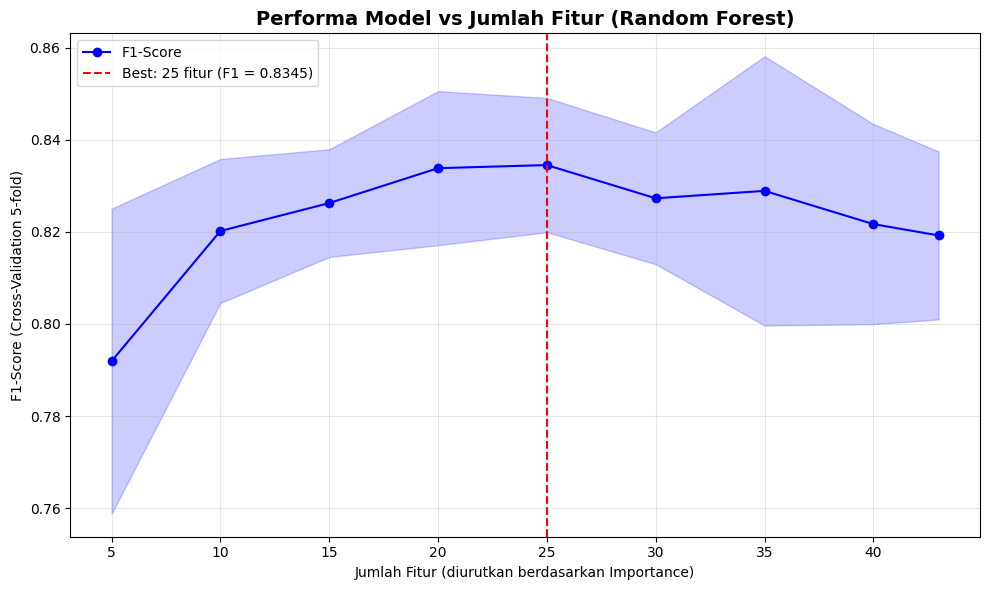

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['n_features'], results_df['f1_mean'], marker='o', label='F1-Score', color='blue')
plt.fill_between(results_df['n_features'],
                 results_df['f1_mean'] - results_df['f1_std'],
                 results_df['f1_mean'] + results_df['f1_std'], alpha=0.2, color='blue')

plt.axvline(x=best_n, color='red', linestyle='--', label=f'Best: {best_n} fitur (F1 = {best_f1:.4f})')
plt.title('Performa Model vs Jumlah Fitur (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Fitur (diurutkan berdasarkan Importance)')
plt.ylabel('F1-Score (Cross-Validation 5-fold)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
top_features = rf_importance['Feature'].head(25).tolist()

print("Fitur Terbaik:")
for i, feat in enumerate(top_features, 1):
    print(f"{i:2}. {feat}")

Fitur Terbaik:
 1. JobTitle
 2. Years_Experience
 3. Job_Opportunities
 4. Years_experience_lastorganization
 5. Training_programs_During_last_three_years
 6. Emotional_Commitment
 7. Allowances
 8. Job_Stability
 9. Job_Satisfaction
10. Distance_to_work
11. Job_Support
12. Psychological_Exhaustion
13. Work_Live_Balance
14. Physical_Stress
15. Payment_Overtime
16. Job_Engagement
17. Rewards_Wages_Satisfaction
18. MonthlySalary
19. Environment_Satisfaction
20. Age
21. Recognition
22. Academic_degree
23. Sector_Other
24. Get_Deserved_Promotion
25. MedicalInsurance


In [ ]:
X_train_nt_selected  = X_train_nt[top_features]
X_test_nt_selected   = X_test_nt[top_features]

## TRAIN-TEST SPLIT (Tree)

In [ ]:
X_tree = df_tree_balanced.drop(columns=['Attrition'])
y_tree = df_tree_balanced['Attrition']

In [ ]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.2, random_state=42, stratify=y_tree
)


In [ ]:
print(f"Training set: {X_train_tree.shape[0]} samples ({X_train_tree.shape[0]/len(X_tree)*100:.1f}%)")
print(f"Test set: {X_test_tree.shape[0]} samples ({X_test_tree.shape[0]/len(X_tree)*100:.1f}%)")
print(f"Features: {X_train_tree.shape[1]}")

Training set: 1081 samples (80.0%)
Test set: 271 samples (20.0%)
Features: 33


In [ ]:
print(f"   Training set:")
print(f"      No Attrition (0): {(y_train_tree == 0).sum()} ({(y_train_tree == 0).sum()/len(y_train_tree)*100:.1f}%)")
print(f"      Attrition (1): {(y_train_tree == 1).sum()} ({(y_train_tree == 1).sum()/len(y_train_tree)*100:.1f}%)")
print(f"   Test set:")
print(f"      No Attrition (0): {(y_test_tree == 0).sum()} ({(y_test_tree == 0).sum()/len(y_test_tree)*100:.1f}%)")
print(f"      Attrition (1): {(y_test_tree == 1).sum()} ({(y_test_tree == 1).sum()/len(y_test_tree)*100:.1f}%)")

   Training set:
      No Attrition (0): 540 (50.0%)
      Attrition (1): 541 (50.0%)
   Test set:
      No Attrition (0): 136 (50.2%)
      Attrition (1): 135 (49.8%)


## Skenario 2: CTGAN

In [ ]:
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    """Evaluate model and return comprehensive metrics"""
    print(f"\n{'='*80}")
    print(f"MODEL: {model_name}")
    print(f"{'='*80}")

    print("\nTraining model...")
    model.fit(X_train, y_train)
    print("Training completed!")

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    print(f"\nPERFORMANCE METRICS:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    print(f"   CV Recall: {cv_mean:.4f} (±{cv_std:.4f})")
    if roc_auc:
        print(f"   ROC-AUC:   {roc_auc:.4f}")

    print(f"\nCLASSIFICATION REPORT:")
    print(classification_report(y_test, y_pred,
                                target_names=['No Attrition (0)', 'Attrition (1)'],
                                zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    print(f"\nCONFUSION MATRIX:")
    print(f"   True Negatives (TN):  {cm[0,0]}")
    print(f"   False Positives (FP): {cm[0,1]}")
    print(f"   False Negatives (FN): {cm[1,0]}")
    print(f"   True Positives (TP):  {cm[1,1]}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Attrition', 'Attrition'],
                yticklabels=['No Attrition', 'Attrition'],
                cbar_kws={'label': 'Count'})
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Recall Mean': cv_mean,
        'CV Recall Std': cv_std,
        'ROC-AUC': roc_auc,
        'Trained Model': model
    }

In [ ]:
non_tree_results = []
tree_results = []
hybrid_results = []

### Single Learning Models

Logistic Regression (Non Tree)


MODEL: Logistic Regression

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8376
   Precision: 0.8473
   Recall:    0.8222
   F1-Score:  0.8346
   CV Recall: 0.8022 (±0.0224)
   ROC-AUC:   0.9026

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.83      0.85      0.84       136
   Attrition (1)       0.85      0.82      0.83       135

        accuracy                           0.84       271
       macro avg       0.84      0.84      0.84       271
    weighted avg       0.84      0.84      0.84       271


CONFUSION MATRIX:
   True Negatives (TN):  116
   False Positives (FP): 20
   False Negatives (FN): 24
   True Positives (TP):  111


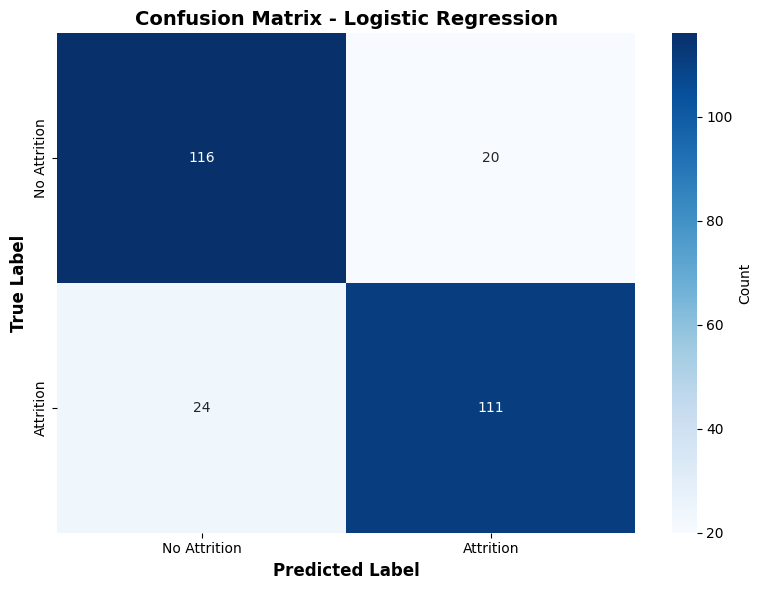

In [ ]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_result = evaluate_model(lr_model, 'Logistic Regression',
                           X_train_nt_selected, X_test_nt_selected, y_train_nt, y_test_nt)
non_tree_results.append(lr_result)

K-Nearest Neighbors (Non Tree)


MODEL: K-Nearest Neighbors

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.7343
   Precision: 0.7838
   Recall:    0.6444
   F1-Score:  0.7073
   CV Recall: 0.6765 (±0.0516)
   ROC-AUC:   0.8212

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.70      0.82      0.76       136
   Attrition (1)       0.78      0.64      0.71       135

        accuracy                           0.73       271
       macro avg       0.74      0.73      0.73       271
    weighted avg       0.74      0.73      0.73       271


CONFUSION MATRIX:
   True Negatives (TN):  112
   False Positives (FP): 24
   False Negatives (FN): 48
   True Positives (TP):  87


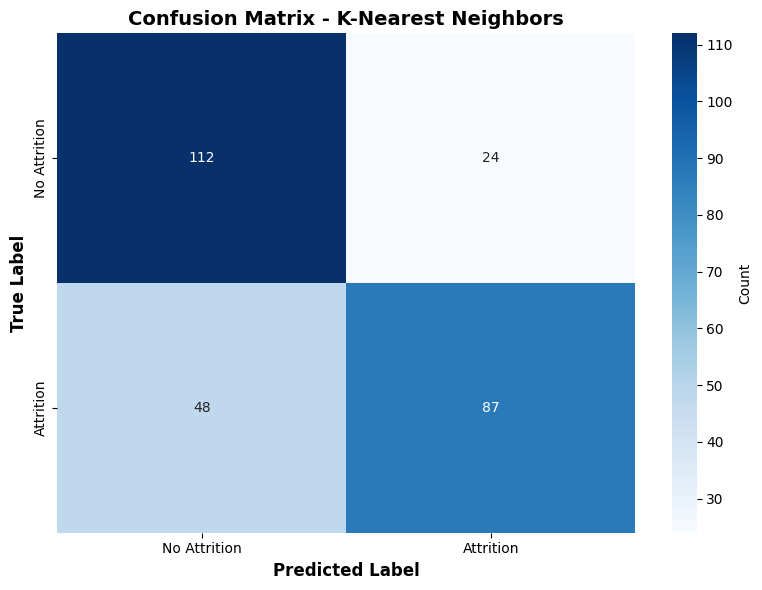

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_result = evaluate_model(knn_model, 'K-Nearest Neighbors',
                            X_train_nt_selected, X_test_nt_selected, y_train_nt, y_test_nt)
non_tree_results.append(knn_result)

Naive Bayes (Non Tree)


MODEL: Naive Bayes

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.7638
   Precision: 0.7351
   Recall:    0.8222
   F1-Score:  0.7762
   CV Recall: 0.8059 (±0.0228)
   ROC-AUC:   0.8389

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.80      0.71      0.75       136
   Attrition (1)       0.74      0.82      0.78       135

        accuracy                           0.76       271
       macro avg       0.77      0.76      0.76       271
    weighted avg       0.77      0.76      0.76       271


CONFUSION MATRIX:
   True Negatives (TN):  96
   False Positives (FP): 40
   False Negatives (FN): 24
   True Positives (TP):  111


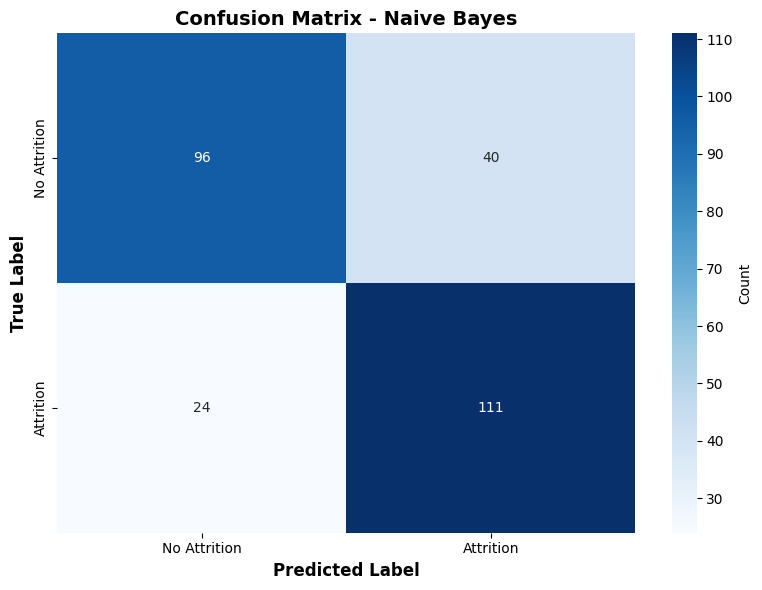

In [ ]:
nb_model = GaussianNB()
nb_result = evaluate_model(nb_model, 'Naive Bayes',
                           X_train_nt_selected, X_test_nt_selected, y_train_nt, y_test_nt)
non_tree_results.append(nb_result)

Support Vector Machine (Non Tree)


MODEL: Support Vector Machine

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8192
   Precision: 0.8359
   Recall:    0.7926
   F1-Score:  0.8137
   CV Recall: 0.7948 (±0.0437)
   ROC-AUC:   0.9115

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.80      0.85      0.82       136
   Attrition (1)       0.84      0.79      0.81       135

        accuracy                           0.82       271
       macro avg       0.82      0.82      0.82       271
    weighted avg       0.82      0.82      0.82       271


CONFUSION MATRIX:
   True Negatives (TN):  115
   False Positives (FP): 21
   False Negatives (FN): 28
   True Positives (TP):  107


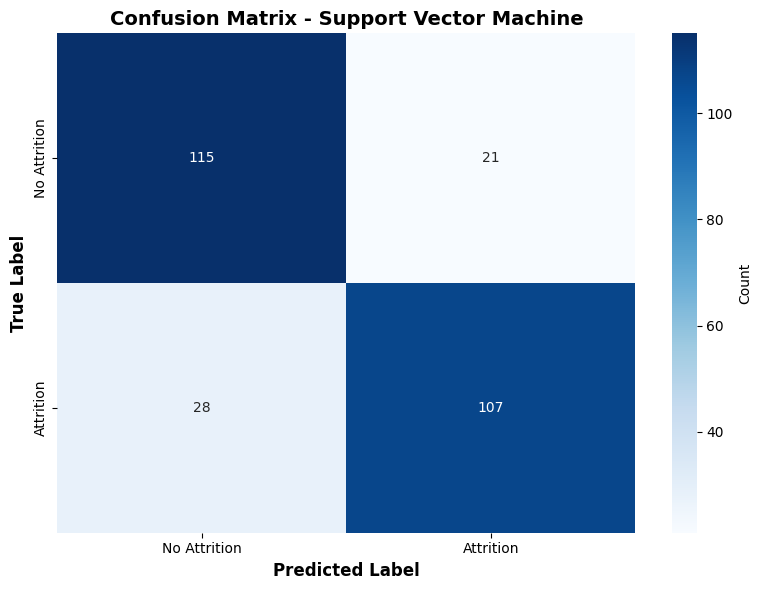

In [ ]:
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_result = evaluate_model(svm_model, 'Support Vector Machine',
                            X_train_nt_selected, X_test_nt_selected, y_train_nt, y_test_nt)
non_tree_results.append(svm_result)

Decision Tree (Tree)


MODEL: Decision Tree

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.7380
   Precision: 0.7388
   Recall:    0.7333
   F1-Score:  0.7361
   CV Recall: 0.7024 (±0.0481)
   ROC-AUC:   0.7380

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.74      0.74      0.74       136
   Attrition (1)       0.74      0.73      0.74       135

        accuracy                           0.74       271
       macro avg       0.74      0.74      0.74       271
    weighted avg       0.74      0.74      0.74       271


CONFUSION MATRIX:
   True Negatives (TN):  101
   False Positives (FP): 35
   False Negatives (FN): 36
   True Positives (TP):  99


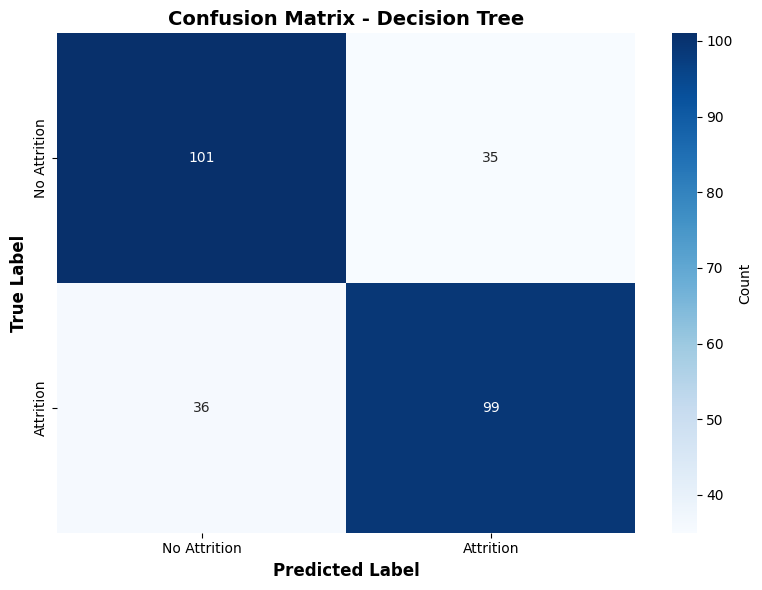

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_result = evaluate_model(dt_model, 'Decision Tree',
                           X_train_tree, X_test_tree, y_train_tree, y_test_tree)
tree_results.append(dt_result)

### Ensemble Learning Models

Random Forest (Tree)


MODEL: Random Forest

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8081
   Precision: 0.8374
   Recall:    0.7630
   F1-Score:  0.7984
   CV Recall: 0.8114 (±0.0370)
   ROC-AUC:   0.9095

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.78      0.85      0.82       136
   Attrition (1)       0.84      0.76      0.80       135

        accuracy                           0.81       271
       macro avg       0.81      0.81      0.81       271
    weighted avg       0.81      0.81      0.81       271


CONFUSION MATRIX:
   True Negatives (TN):  116
   False Positives (FP): 20
   False Negatives (FN): 32
   True Positives (TP):  103


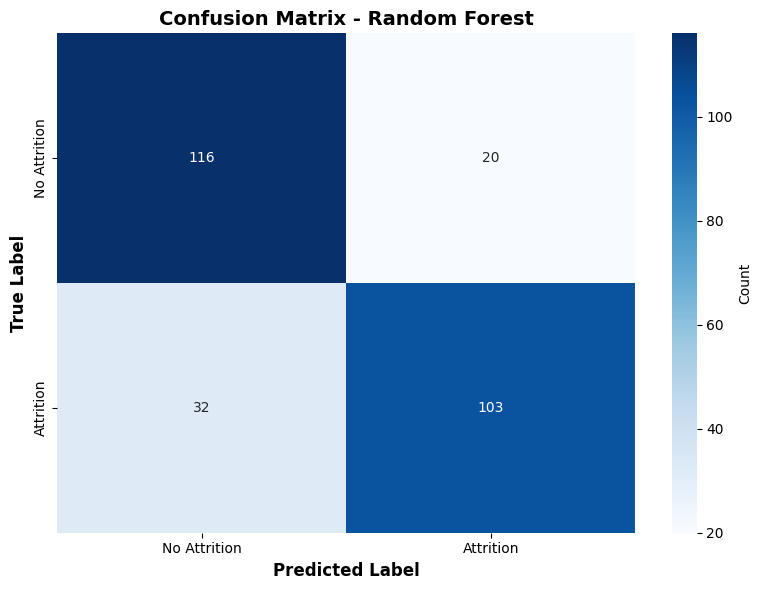

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_result = evaluate_model(rf_model, 'Random Forest',
                           X_train_tree, X_test_tree, y_train_tree, y_test_tree)
tree_results.append(rf_result)

Gradient Boosting (Tree)


MODEL: Gradient Boosting

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8524
   Precision: 0.8740
   Recall:    0.8222
   F1-Score:  0.8473
   CV Recall: 0.8133 (±0.0225)
   ROC-AUC:   0.9397

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.83      0.88      0.86       136
   Attrition (1)       0.87      0.82      0.85       135

        accuracy                           0.85       271
       macro avg       0.85      0.85      0.85       271
    weighted avg       0.85      0.85      0.85       271


CONFUSION MATRIX:
   True Negatives (TN):  120
   False Positives (FP): 16
   False Negatives (FN): 24
   True Positives (TP):  111


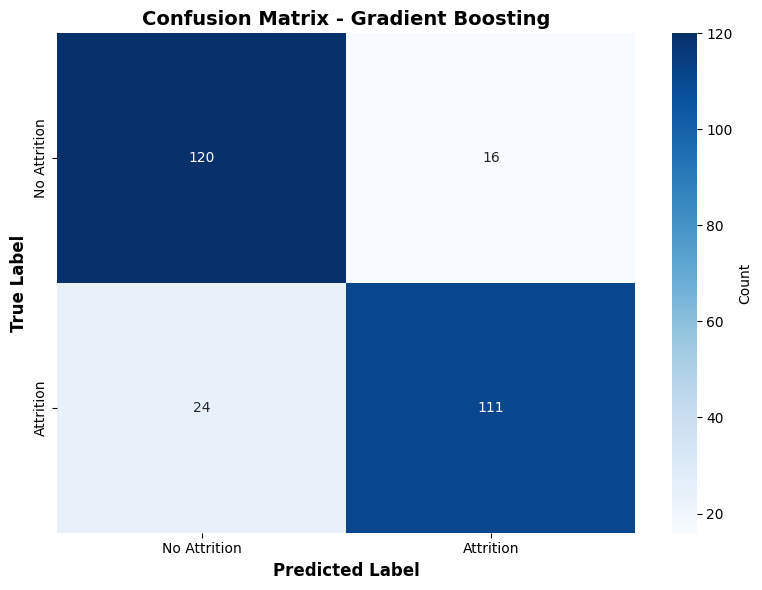

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_result = evaluate_model(gb_model, 'Gradient Boosting',
                           X_train_tree, X_test_tree, y_train_tree, y_test_tree)
tree_results.append(gb_result)

AdaBoost (Tree)


MODEL: AdaBoost

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8192
   Precision: 0.8413
   Recall:    0.7852
   F1-Score:  0.8123
   CV Recall: 0.7949 (±0.0366)
   ROC-AUC:   0.8891

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.80      0.85      0.83       136
   Attrition (1)       0.84      0.79      0.81       135

        accuracy                           0.82       271
       macro avg       0.82      0.82      0.82       271
    weighted avg       0.82      0.82      0.82       271


CONFUSION MATRIX:
   True Negatives (TN):  116
   False Positives (FP): 20
   False Negatives (FN): 29
   True Positives (TP):  106


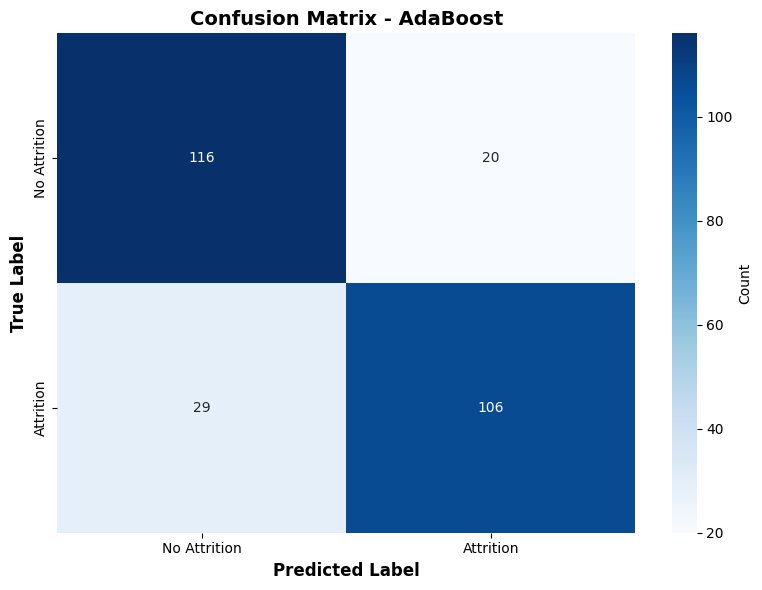

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_result = evaluate_model(ada_model, 'AdaBoost',
                            X_train_tree, X_test_tree, y_train_tree, y_test_tree)
tree_results.append(ada_result)

Extra Trees (Tree)


MODEL: Extra Trees

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8081
   Precision: 0.8320
   Recall:    0.7704
   F1-Score:  0.8000
   CV Recall: 0.8022 (±0.0347)
   ROC-AUC:   0.9042

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.79      0.85      0.82       136
   Attrition (1)       0.83      0.77      0.80       135

        accuracy                           0.81       271
       macro avg       0.81      0.81      0.81       271
    weighted avg       0.81      0.81      0.81       271


CONFUSION MATRIX:
   True Negatives (TN):  115
   False Positives (FP): 21
   False Negatives (FN): 31
   True Positives (TP):  104


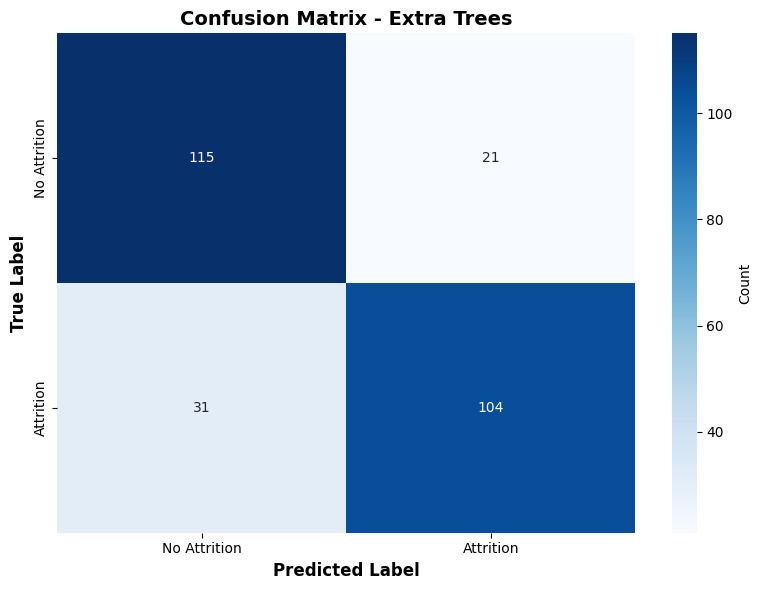

In [ ]:
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_result = evaluate_model(et_model, 'Extra Trees',
                           X_train_tree, X_test_tree, y_train_tree, y_test_tree)
tree_results.append(et_result)

XGBoost (Tree)


MODEL: XGBoost

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8487
   Precision: 0.8672
   Recall:    0.8222
   F1-Score:  0.8441
   CV Recall: 0.8189 (±0.0344)
   ROC-AUC:   0.9391

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.83      0.88      0.85       136
   Attrition (1)       0.87      0.82      0.84       135

        accuracy                           0.85       271
       macro avg       0.85      0.85      0.85       271
    weighted avg       0.85      0.85      0.85       271


CONFUSION MATRIX:
   True Negatives (TN):  119
   False Positives (FP): 17
   False Negatives (FN): 24
   True Positives (TP):  111


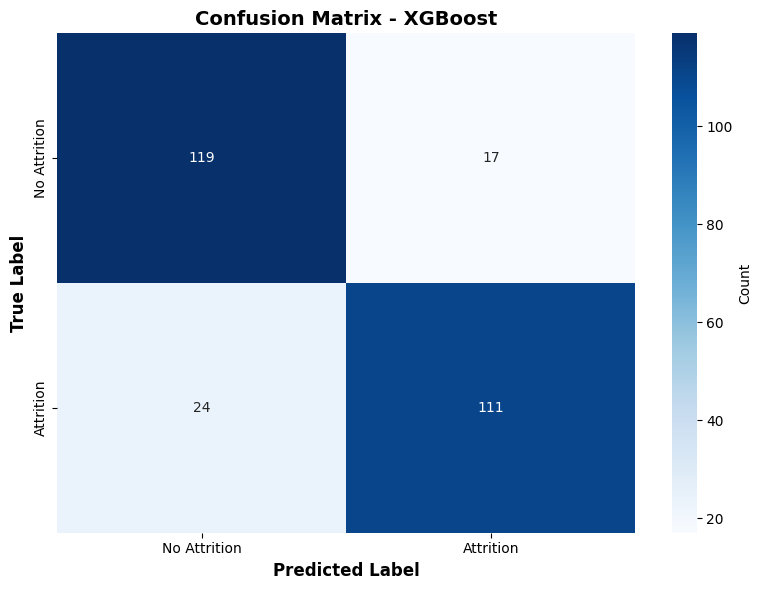

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)
xgb_result = evaluate_model(xgb_model, 'XGBoost',
                            X_train_tree, X_test_tree, y_train_tree, y_test_tree)
tree_results.append(xgb_result)

CatBoost (Tree)


MODEL: CatBoost

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8450
   Precision: 0.8605
   Recall:    0.8222
   F1-Score:  0.8409
   CV Recall: 0.8170 (±0.0328)
   ROC-AUC:   0.9324

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.83      0.87      0.85       136
   Attrition (1)       0.86      0.82      0.84       135

        accuracy                           0.85       271
       macro avg       0.85      0.84      0.84       271
    weighted avg       0.85      0.85      0.84       271


CONFUSION MATRIX:
   True Negatives (TN):  118
   False Positives (FP): 18
   False Negatives (FN): 24
   True Positives (TP):  111


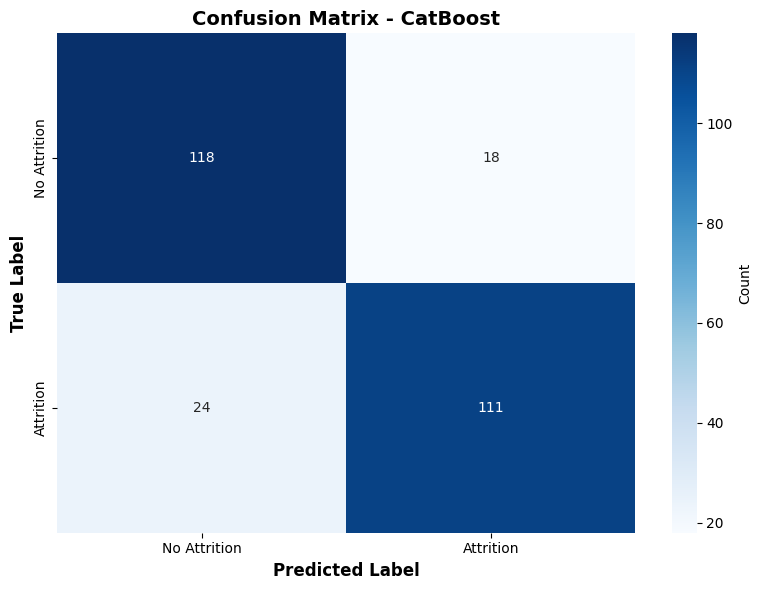

In [ ]:
cat_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    random_seed=42,
    verbose=0,
    early_stopping_rounds=50,
    eval_metric='F1'
)
cat_result = evaluate_model(cat_model, 'CatBoost',
                            X_train_tree, X_test_tree, y_train_tree, y_test_tree)
tree_results.append(cat_result)

### HYBRID & ENSEMBLE MODELS

Voting Classifier (Soft Voting)


MODEL: Voting Classifier

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8524
   Precision: 0.8740
   Recall:    0.8222
   F1-Score:  0.8473
   CV Recall: 0.8207 (±0.0319)
   ROC-AUC:   0.9401

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.83      0.88      0.86       136
   Attrition (1)       0.87      0.82      0.85       135

        accuracy                           0.85       271
       macro avg       0.85      0.85      0.85       271
    weighted avg       0.85      0.85      0.85       271


CONFUSION MATRIX:
   True Negatives (TN):  120
   False Positives (FP): 16
   False Negatives (FN): 24
   True Positives (TP):  111


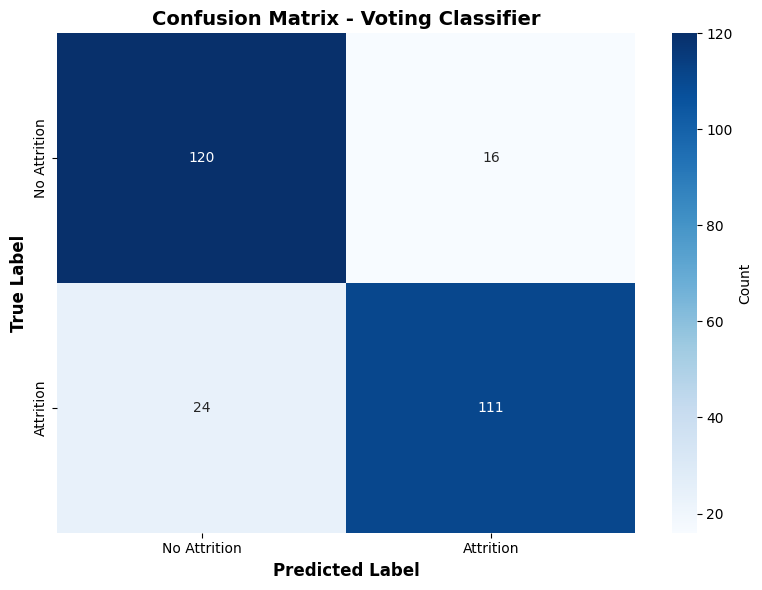

In [ ]:
voting_soft = VotingClassifier(
    estimators=[
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.05,
                             subsample=0.8, colsample_bytree=0.8,
                             random_state=42, eval_metric='logloss', n_jobs=-1)),
        ('cat', CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05,
                                   random_seed=42, verbose=0))
    ],
    voting='soft'
)

voting_result = evaluate_model(
    voting_soft,
    'Voting Classifier',
    X_train_tree,
    X_test_tree,
    y_train_tree,
    y_test_tree
)
hybrid_results.append(voting_result)

Stacking Classifier


MODEL: Stacking Classifier

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8524
   Precision: 0.8626
   Recall:    0.8370
   F1-Score:  0.8496
   CV Recall: 0.8336 (±0.0304)
   ROC-AUC:   0.9389

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.84      0.87      0.86       136
   Attrition (1)       0.86      0.84      0.85       135

        accuracy                           0.85       271
       macro avg       0.85      0.85      0.85       271
    weighted avg       0.85      0.85      0.85       271


CONFUSION MATRIX:
   True Negatives (TN):  118
   False Positives (FP): 18
   False Negatives (FN): 22
   True Positives (TP):  113


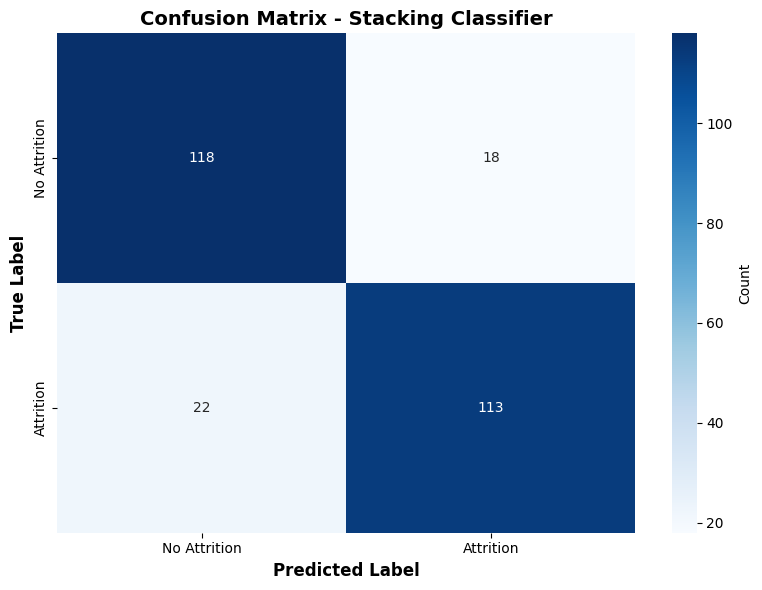

In [ ]:
stacking_model = StackingClassifier(
    estimators=[
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.05,
                             random_state=42, eval_metric='logloss', n_jobs=-1)),
        ('cat', CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05,
                                   random_seed=42, verbose=0)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5
)

stacking_result = evaluate_model(
    stacking_model,
    'Stacking Classifier',
    X_train_tree,
    X_test_tree,
    y_train_tree,
    y_test_tree
)
hybrid_results.append(stacking_result)

### HASIL

In [ ]:
all_results = non_tree_results + tree_results + hybrid_results
baseline_df  = pd.DataFrame([{k: v for k, v in r.items() if k != 'Trained Model'} for r in all_results])
baseline_df  = baseline_df.sort_values('F1-Score', ascending=False).reset_index(drop=True).round(3)

baseline_df

,Model,Accuracy,Precision,Recall,F1-Score,CV Recall Mean,CV Recall Std,ROC-AUC
0,Stacking Classifier,0.852,0.863,0.837,0.850,0.834,0.030,0.939
1,Gradient Boosting,0.852,0.874,0.822,0.847,0.813,0.023,0.940
2,Voting Classifier,0.852,0.874,0.822,0.847,0.821,0.032,0.940
3,XGBoost,0.849,0.867,0.822,0.844,0.819,0.034,0.939
4,CatBoost,0.845,0.860,0.822,0.841,0.817,0.033,0.932
5,Logistic Regression,0.838,0.847,0.822,0.835,0.802,0.022,0.903
6,Support Vector Machine,0.819,0.836,0.793,0.814,0.795,0.044,0.911
7,AdaBoost,0.819,0.841,0.785,0.812,0.795,0.037,0.889
8,Extra Trees,0.808,0.832,0.770,0.800,0.802,0.035,0.904
9,Random Forest,0.808,0.837,0.763,0.798,0.811,0.037,0.910


In [ ]:
top_5_df = baseline_df.head(5).copy()
print("\n" + "="*80)
print("TOP 5 MODELS SELECTED FOR TUNING:")
print("="*80)
for idx, row in top_5_df.iterrows():
    print(f"{idx+1}. {row['Model']:<40} | Recall={row['Recall']:.4f} | F1={row['F1-Score']:.4f}")


TOP 5 MODELS SELECTED FOR TUNING:
1. Stacking Classifier                      | Recall=0.8370 | F1=0.8500
2. Gradient Boosting                        | Recall=0.8220 | F1=0.8470
3. Voting Classifier                        | Recall=0.8220 | F1=0.8470
4. XGBoost                                  | Recall=0.8220 | F1=0.8440
5. CatBoost                                 | Recall=0.8220 | F1=0.8410


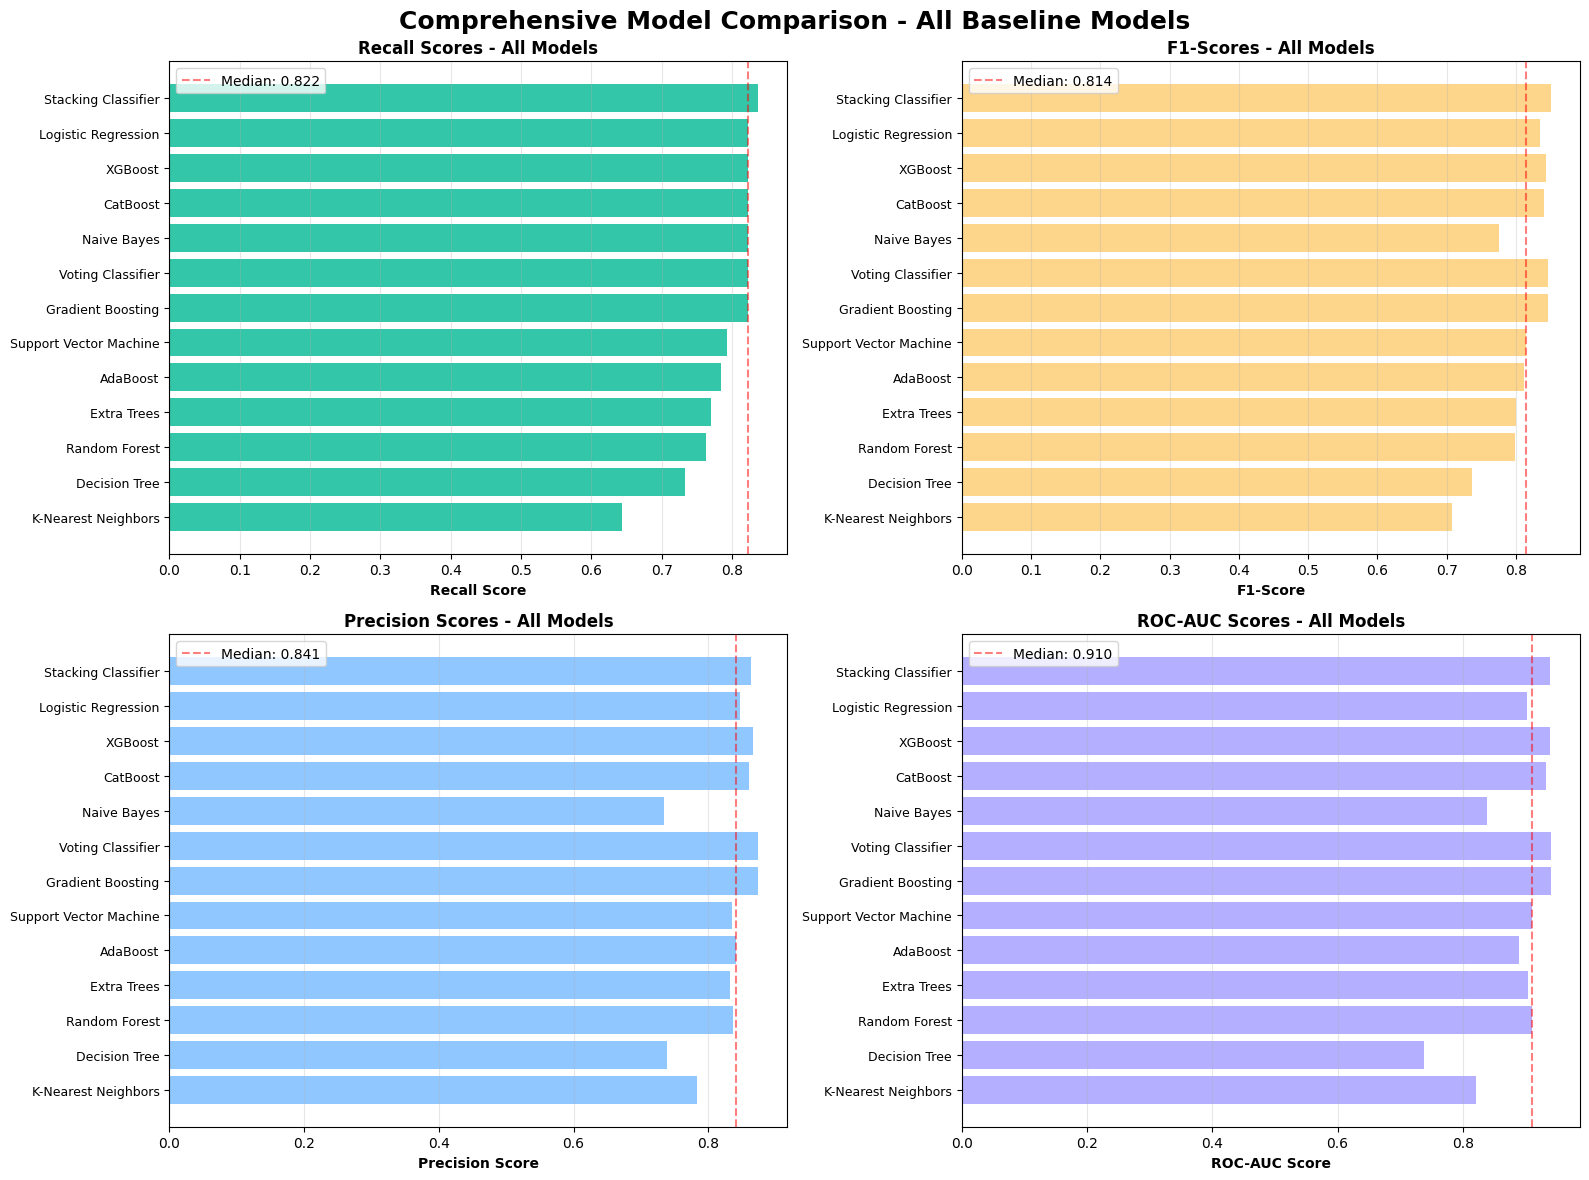

In [ ]:
# 1. Compare ALL baseline models
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comprehensive Model Comparison - All Baseline Models',
             fontsize=18, fontweight='bold')

# Sort by recall for better visualization
plot_df = baseline_df.sort_values('Recall', ascending=True)

# Recall comparison
axes[0, 0].barh(range(len(plot_df)), plot_df['Recall'], color='#00b894', alpha=0.8)
axes[0, 0].set_yticks(range(len(plot_df)))
axes[0, 0].set_yticklabels(plot_df['Model'], fontsize=9)
axes[0, 0].set_xlabel('Recall Score', fontweight='bold')
axes[0, 0].set_title('Recall Scores - All Models', fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].axvline(x=plot_df['Recall'].median(), color='red',
                   linestyle='--', alpha=0.5, label=f'Median: {plot_df["Recall"].median():.3f}')
axes[0, 0].legend()

# F1-Score comparison
axes[0, 1].barh(range(len(plot_df)), plot_df['F1-Score'], color='#fdcb6e', alpha=0.8)
axes[0, 1].set_yticks(range(len(plot_df)))
axes[0, 1].set_yticklabels(plot_df['Model'], fontsize=9)
axes[0, 1].set_xlabel('F1-Score', fontweight='bold')
axes[0, 1].set_title('F1-Scores - All Models', fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)
axes[0, 1].axvline(x=plot_df['F1-Score'].median(), color='red',
                   linestyle='--', alpha=0.5, label=f'Median: {plot_df["F1-Score"].median():.3f}')
axes[0, 1].legend()

# Precision comparison
axes[1, 0].barh(range(len(plot_df)), plot_df['Precision'], color='#74b9ff', alpha=0.8)
axes[1, 0].set_yticks(range(len(plot_df)))
axes[1, 0].set_yticklabels(plot_df['Model'], fontsize=9)
axes[1, 0].set_xlabel('Precision Score', fontweight='bold')
axes[1, 0].set_title('Precision Scores - All Models', fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].axvline(x=plot_df['Precision'].median(), color='red',
                   linestyle='--', alpha=0.5, label=f'Median: {plot_df["Precision"].median():.3f}')
axes[1, 0].legend()

# ROC-AUC comparison
axes[1, 1].barh(range(len(plot_df)), plot_df['ROC-AUC'], color='#a29bfe', alpha=0.8)
axes[1, 1].set_yticks(range(len(plot_df)))
axes[1, 1].set_yticklabels(plot_df['Model'], fontsize=9)
axes[1, 1].set_xlabel('ROC-AUC Score', fontweight='bold')
axes[1, 1].set_title('ROC-AUC Scores - All Models', fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)
axes[1, 1].axvline(x=plot_df['ROC-AUC'].median(), color='red',
                   linestyle='--', alpha=0.5, label=f'Median: {plot_df["ROC-AUC"].median():.3f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

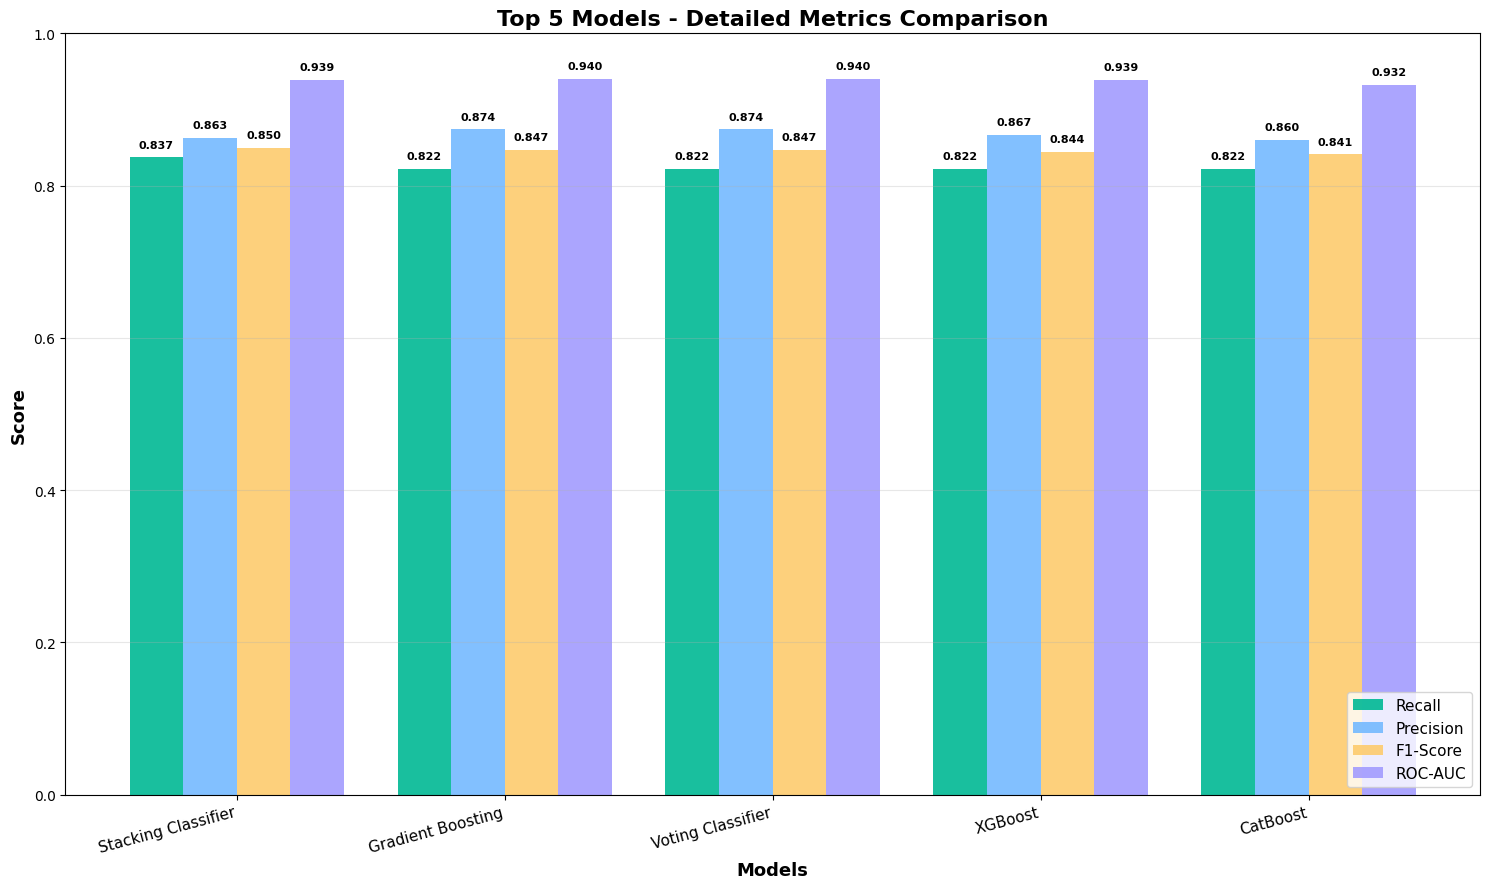

In [ ]:
# 2. Top 4 models detailed comparison
fig, ax = plt.subplots(figsize=(15, 9))

top_5_plot = baseline_df.head(5)
metrics = ['Recall', 'Precision', 'F1-Score', 'ROC-AUC']
x = np.arange(len(top_5_plot))
width = 0.2

colors = ['#00b894', '#74b9ff', '#fdcb6e', '#a29bfe']

for i, metric in enumerate(metrics):
    values = top_5_plot[metric].values
    ax.bar(x + i*width, values, width, label=metric, color=colors[i], alpha=0.9)

    # Add value labels on bars
    for j, v in enumerate(values):
        ax.text(x[j] + i*width, v + 0.01, f'{v:.3f}',
                ha='center', va='bottom', fontsize=8, fontweight='bold')

ax.set_xlabel('Models', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_title('Top 5 Models - Detailed Metrics Comparison',
             fontsize=16, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(top_5_plot['Model'], rotation=15, ha='right', fontsize=11)
ax.legend(loc='lower right', fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

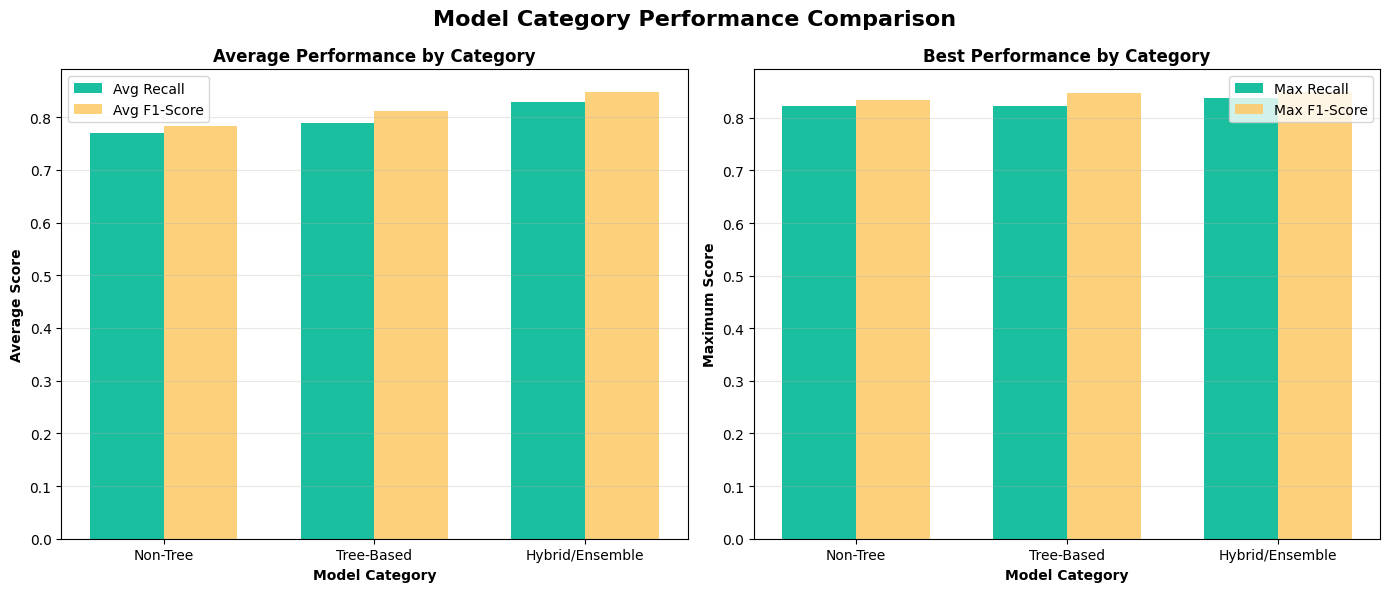

In [ ]:
# 3. Model category comparison (Non-Tree vs Tree vs Hybrid)
category_data = {
    'Non-Tree': [r for r in all_results if r in non_tree_results],
    'Tree-Based': [r for r in all_results if r in tree_results],
    'Hybrid/Ensemble': [r for r in all_results if r in hybrid_results]
}

category_stats = []
for cat_name, models in category_data.items():
    if models:
        recalls = [m['Recall'] for m in models]
        f1s = [m['F1-Score'] for m in models]
        category_stats.append({
            'Category': cat_name,
            'Avg Recall': np.mean(recalls),
            'Avg F1': np.mean(f1s),
            'Max Recall': np.max(recalls),
            'Max F1': np.max(f1s),
            'Count': len(models)
        })

cat_df = pd.DataFrame(category_stats)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Model Category Performance Comparison', fontsize=16, fontweight='bold')

x_cat = np.arange(len(cat_df))
width = 0.35

# Average scores
axes[0].bar(x_cat - width/2, cat_df['Avg Recall'], width,
           label='Avg Recall', color='#00b894', alpha=0.9)
axes[0].bar(x_cat + width/2, cat_df['Avg F1'], width,
           label='Avg F1-Score', color='#fdcb6e', alpha=0.9)
axes[0].set_xlabel('Model Category', fontweight='bold')
axes[0].set_ylabel('Average Score', fontweight='bold')
axes[0].set_title('Average Performance by Category', fontweight='bold')
axes[0].set_xticks(x_cat)
axes[0].set_xticklabels(cat_df['Category'])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Max scores
axes[1].bar(x_cat - width/2, cat_df['Max Recall'], width,
           label='Max Recall', color='#00b894', alpha=0.9)
axes[1].bar(x_cat + width/2, cat_df['Max F1'], width,
           label='Max F1-Score', color='#fdcb6e', alpha=0.9)
axes[1].set_xlabel('Model Category', fontweight='bold')
axes[1].set_ylabel('Maximum Score', fontweight='bold')
axes[1].set_title('Best Performance by Category', fontweight='bold')
axes[1].set_xticks(x_cat)
axes[1].set_xticklabels(cat_df['Category'])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### HYPERPARAMETER TUNING

Tuning Progress:   0%|          | 0/5 [00:00<?, ?it/s]


TUNING: Stacking Classifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



✓ Best params: {'xgb__n_estimators': 500, 'gb__n_estimators': 300, 'gb__learning_rate': 0.1, 'cat__iterations': 400}
✓ Best CV Recall: 0.8337

MODEL: Stacking Classifier (Tuned)

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8524
   Precision: 0.8740
   Recall:    0.8222
   F1-Score:  0.8473
   CV Recall: 0.8337 (±0.0360)
   ROC-AUC:   0.9390

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.83      0.88      0.86       136
   Attrition (1)       0.87      0.82      0.85       135

        accuracy                           0.85       271
       macro avg       0.85      0.85      0.85       271
    weighted avg       0.85      0.85      0.85       271


CONFUSION MATRIX:
   True Negatives (TN):  120
   False Positives (FP): 16
   False Negatives (FN): 24
   True Positives (TP):  111


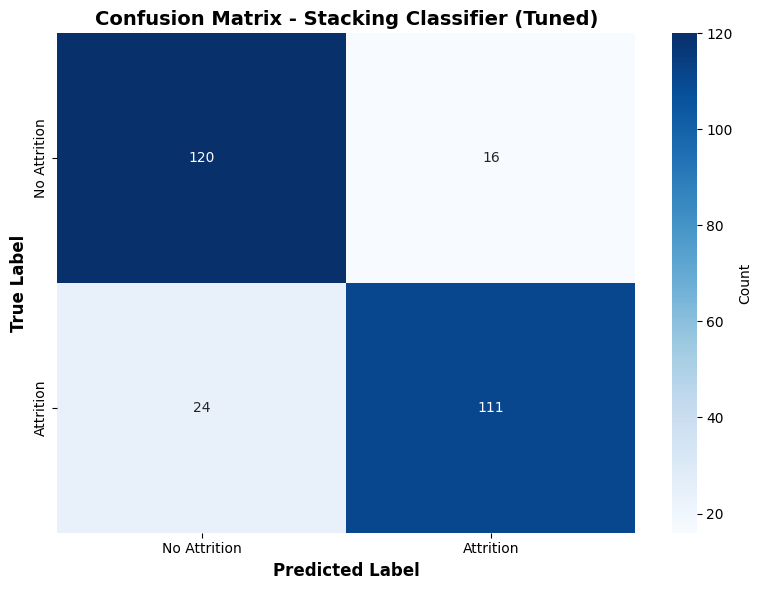


TUNING: Gradient Boosting
Fitting 5 folds for each of 162 candidates, totalling 810 fits

✓ Best params: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
✓ Best CV Recall: 0.8392

MODEL: Gradient Boosting (Tuned)

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8339
   Precision: 0.8571
   Recall:    0.8000
   F1-Score:  0.8276
   CV Recall: 0.8392 (±0.0264)
   ROC-AUC:   0.9277

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.81      0.87      0.84       136
   Attrition (1)       0.86      0.80      0.83       135

        accuracy                           0.83       271
       macro avg       0.84      0.83      0.83       271
    weighted avg       0.84      0.83      0.83       271


CONFUSION MATRIX:
   True Negatives (TN):  118
   False Positives (FP): 18
   False Negatives (FN): 27
   True Positives (TP):  108


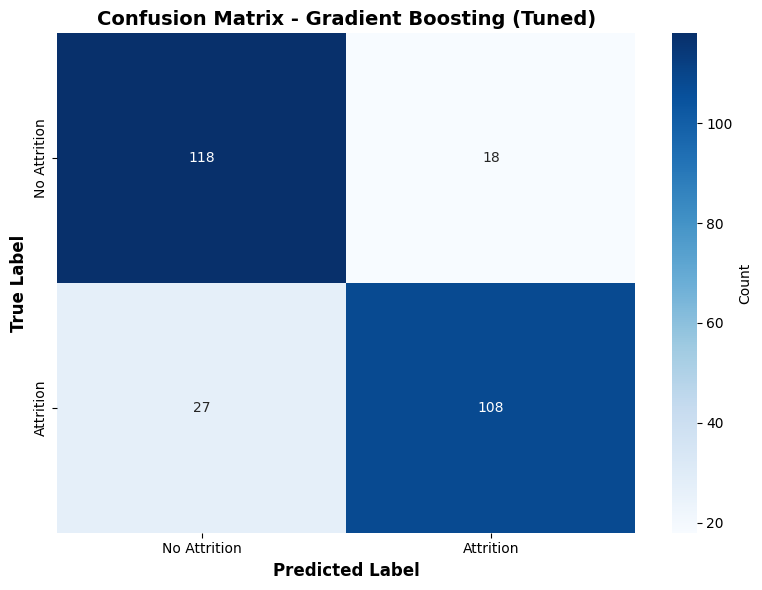


TUNING: Voting Classifier
Fitting 5 folds for each of 50 candidates, totalling 250 fits

✓ Best params: {'xgb__n_estimators': 500, 'xgb__max_depth': 5, 'gb__n_estimators': 300, 'gb__max_depth': 4, 'gb__learning_rate': 0.05, 'cat__iterations': 500}
✓ Best CV Recall: 0.8262

MODEL: Voting Classifier (Tuned)

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8229
   Precision: 0.8425
   Recall:    0.7926
   F1-Score:  0.8168
   CV Recall: 0.8262 (±0.0359)
   ROC-AUC:   0.9358

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.81      0.85      0.83       136
   Attrition (1)       0.84      0.79      0.82       135

        accuracy                           0.82       271
       macro avg       0.82      0.82      0.82       271
    weighted avg       0.82      0.82      0.82       271


CONFUSION MATRIX:
   True Negatives (TN):  116
   False Positives (FP): 20
   False Negatives (FN): 28
   True Positive

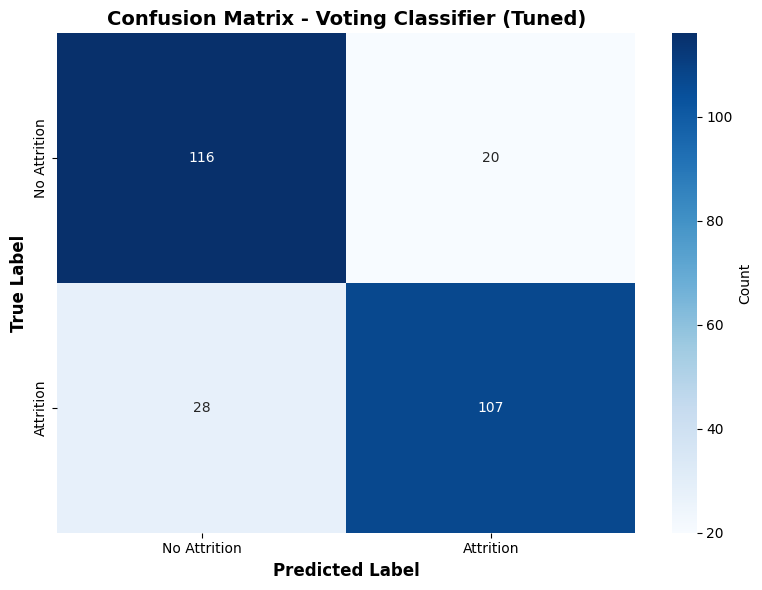


TUNING: XGBoost
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✓ Best params: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
✓ Best CV Recall: 0.8392

MODEL: XGBoost (Tuned)

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8450
   Precision: 0.8720
   Recall:    0.8074
   F1-Score:  0.8385
   CV Recall: 0.8392 (±0.0188)
   ROC-AUC:   0.9412

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.82      0.88      0.85       136
   Attrition (1)       0.87      0.81      0.84       135

        accuracy                           0.85       271
       macro avg       0.85      0.84      0.84       271
    weighted avg       0.85      0.85      0.84       271


CONFUSION MATRIX:
   True Negatives (TN):  120
   False Positives (FP): 16
   False Negatives (FN): 26
   True Positives (TP):  109


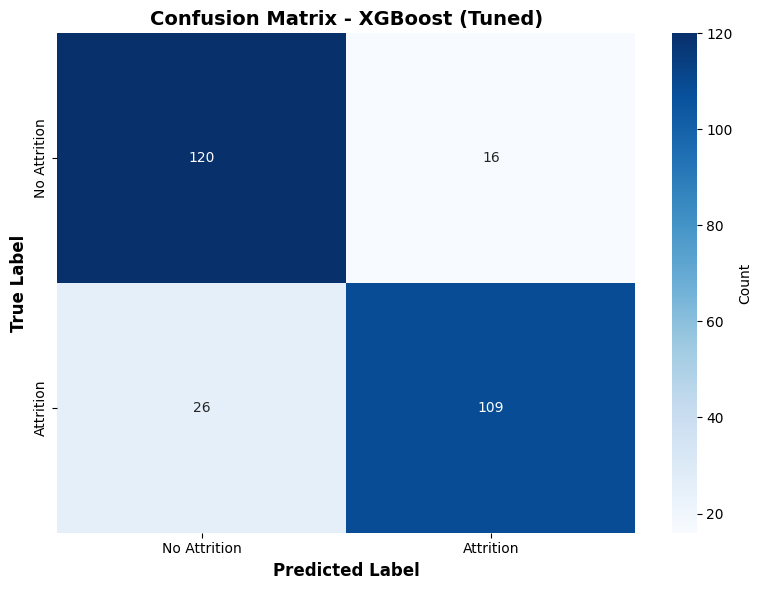


TUNING: CatBoost
Fitting 5 folds for each of 60 candidates, totalling 300 fits

✓ Best params: {'bagging_temperature': np.float64(0.16244897978781553), 'depth': 4, 'iterations': 559, 'l2_leaf_reg': 3, 'learning_rate': np.float64(0.11337419196476455)}
✓ Best CV Recall: 0.8337

MODEL: CatBoost (Tuned)

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8229
   Precision: 0.8480
   Recall:    0.7852
   F1-Score:  0.8154
   CV Recall: 0.8337 (±0.0329)
   ROC-AUC:   0.9215

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.80      0.86      0.83       136
   Attrition (1)       0.85      0.79      0.82       135

        accuracy                           0.82       271
       macro avg       0.82      0.82      0.82       271
    weighted avg       0.82      0.82      0.82       271


CONFUSION MATRIX:
   True Negatives (TN):  117
   False Positives (FP): 19
   False Negatives (FN): 29
   True Positives (TP)

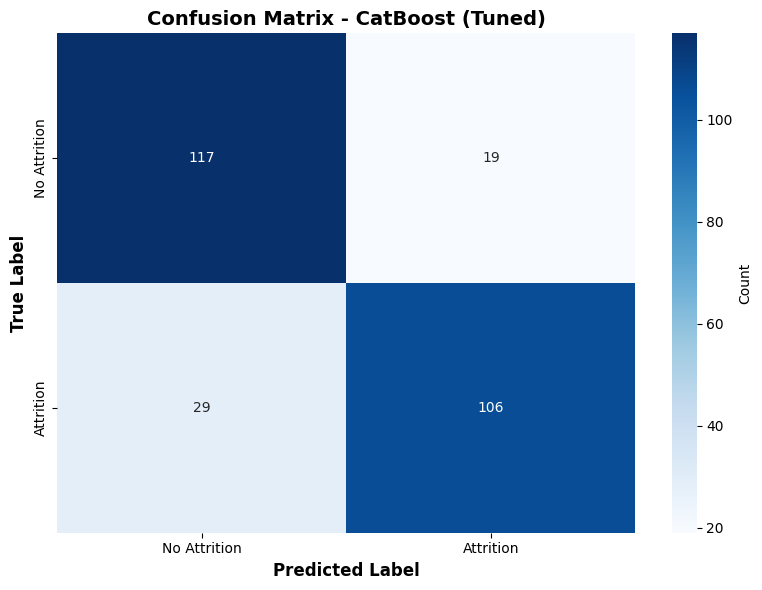

In [ ]:
tuned_results = []

# Extract model names from top 4
top_5_names = top_5_df['Model'].tolist()

# Loop through top 4 and tune
for model_name in tqdm(top_5_names, desc="Tuning Progress"):

    print(f"\n{'='*70}")
    print(f"TUNING: {model_name}")
    print(f"{'='*70}")

    # Determine data and model based on name
    if 'Naive Bayes' in model_name:
        model = GaussianNB()
        X_tr, X_te, y_tr, y_te = X_train_nt_selected, X_test_nt_selected, y_train_nt, y_test_nt
        param_grid = {}
        search_type = 'none'

    elif 'Gradient Boosting' in model_name:
        model = GradientBoostingClassifier(random_state=42)
        X_tr, X_te, y_tr, y_te = X_train_tree, X_test_tree, y_train_tree, y_test_tree
        param_grid = {
            'n_estimators': [200, 300, 400],
            'learning_rate': [0.05, 0.08, 0.1],
            'max_depth': [3, 4, 5],
            'subsample': [0.8, 0.9, 1.0],
            'min_samples_split': [2, 5]
        }
        search_type = 'grid'

    elif 'XGBoost' in model_name:
        model = XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1)
        X_tr, X_te, y_tr, y_te = X_train_tree, X_test_tree, y_train_tree, y_test_tree
        param_grid = {
            'n_estimators': [300, 500],
            'max_depth': [4, 5, 6],
            'learning_rate': [0.03, 0.05, 0.1],
            'subsample': [0.8, 0.9],
            'colsample_bytree': [0.8, 0.9],
            'gamma': [0, 0.1, 0.2]
        }
        search_type = 'grid'

    elif 'CatBoost' in model_name:
        model = CatBoostClassifier(random_seed=42, verbose=0,
                                   early_stopping_rounds=100, eval_metric='F1')
        X_tr, X_te, y_tr, y_te = X_train_tree, X_test_tree, y_train_tree, y_test_tree
        param_grid = {
            'iterations': randint(400, 800),
            'depth': randint(4, 8),
            'learning_rate': uniform(0.03, 0.12),
            'l2_leaf_reg': randint(1, 7),
            'bagging_temperature': uniform(0, 0.8)
        }
        search_type = 'randomized'

    elif 'Voting' in model_name:
        model = VotingClassifier(
            estimators=[
                ('gb', GradientBoostingClassifier(random_state=42)),
                ('xgb', XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1)),
                ('cat', CatBoostClassifier(random_seed=42, verbose=0))
            ],
            voting='soft'
        )
        X_tr, X_te, y_tr, y_te = X_train_tree, X_test_tree, y_train_tree, y_test_tree
        param_grid = {
            'gb__n_estimators': [200, 300],
            'gb__learning_rate': [0.05, 0.1],
            'gb__max_depth': [3, 4],
            'xgb__n_estimators': [300, 500],
            'xgb__max_depth': [5, 6],
            'cat__iterations': [400, 500]
        }
        search_type = 'randomized'

    elif 'Stacking' in model_name:
        model = StackingClassifier(
            estimators=[
                ('gb', GradientBoostingClassifier(random_state=42)),
                ('xgb', XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1)),
                ('cat', CatBoostClassifier(random_seed=42, verbose=0))
            ],
            final_estimator=LogisticRegression(max_iter=1000, random_state=42),
            cv=5
        )
        X_tr, X_te, y_tr, y_te = X_train_tree, X_test_tree, y_train_tree, y_test_tree
        param_grid = {
            'gb__n_estimators': [200, 300],
            'gb__learning_rate': [0.05, 0.1],
            'xgb__n_estimators': [300, 500],
            'cat__iterations': [400, 500]
        }
        search_type = 'randomized'

    else:
        print(f"⚠️ Model {model_name} not configured for tuning, skipping...")
        continue

    # Perform tuning
    if search_type == 'none':
        best_model = model.fit(X_tr, y_tr)
        print("✓ No tuning needed")

    elif search_type == 'randomized':
        n_iter = 60 if 'CatBoost' in model_name else 50
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid,
            n_iter=n_iter,
            cv=5,
            scoring='recall',
            n_jobs=-1,
            random_state=42,
            verbose=1
        )
        search.fit(X_tr, y_tr)
        best_model = search.best_estimator_
        print(f"\n✓ Best params: {search.best_params_}")
        print(f"✓ Best CV Recall: {search.best_score_:.4f}")

    else:  # grid
        search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=5,
            scoring='recall',
            n_jobs=-1,
            verbose=1
        )
        search.fit(X_tr, y_tr)
        best_model = search.best_estimator_
        print(f"\n✓ Best params: {search.best_params_}")
        print(f"✓ Best CV Recall: {search.best_score_:.4f}")

    # Evaluate tuned model
    result = evaluate_model(best_model, f"{model_name} (Tuned)", X_tr, X_te, y_tr, y_te)
    tuned_results.append(result)

In [ ]:
comparison_rows = []

for model_name in top_5_names:
    # Find baseline
    baseline_row = baseline_df[baseline_df['Model'] == model_name]
    if baseline_row.empty:
        continue

    baseline_row = baseline_row.iloc[0]

    # Add baseline
    comparison_rows.append({
        'Model': model_name,
        'Version': 'Baseline',
        'Recall': baseline_row['Recall'],
        'Precision': baseline_row['Precision'],
        'F1-Score': baseline_row['F1-Score'],
        'ROC-AUC': baseline_row['ROC-AUC']
    })

    # Find tuned
    tuned_row = next((r for r in tuned_results if model_name in r['Model']), None)
    if tuned_row:
        comparison_rows.append({
            'Model': model_name,
            'Version': 'Tuned',
            'Recall': tuned_row['Recall'],
            'Precision': tuned_row['Precision'],
            'F1-Score': tuned_row['F1-Score'],
            'ROC-AUC': tuned_row['ROC-AUC']
        })

comparison_df = pd.DataFrame(comparison_rows).round(4)
comparison_df

,Model,Version,Recall,Precision,F1-Score,ROC-AUC
0,Stacking Classifier,Baseline,0.8370,0.8630,0.8500,0.9390
1,Stacking Classifier,Tuned,0.8222,0.8740,0.8473,0.9390
2,Gradient Boosting,Baseline,0.8220,0.8740,0.8470,0.9400
3,Gradient Boosting,Tuned,0.8000,0.8571,0.8276,0.9277
4,Voting Classifier,Baseline,0.8220,0.8740,0.8470,0.9400
5,Voting Classifier,Tuned,0.7926,0.8425,0.8168,0.9358
6,XGBoost,Baseline,0.8220,0.8670,0.8440,0.9390
7,XGBoost,Tuned,0.8074,0.8720,0.8385,0.9412
8,CatBoost,Baseline,0.8220,0.8600,0.8410,0.9320
9,CatBoost,Tuned,0.7852,0.8480,0.8154,0.9215


In [ ]:
for model_name in top_5_names:
    baseline_rows = comparison_df[(comparison_df['Model'] == model_name) &
                                 (comparison_df['Version'] == 'Baseline')]
    tuned_rows = comparison_df[(comparison_df['Model'] == model_name) &
                              (comparison_df['Version'] == 'Tuned')]

    if baseline_rows.empty or tuned_rows.empty:
        continue

    baseline_vals = baseline_rows.iloc[0]
    tuned_vals = tuned_rows.iloc[0]

    recall_change = tuned_vals['Recall'] - baseline_vals['Recall']
    f1_change = tuned_vals['F1-Score'] - baseline_vals['F1-Score']

    recall_pct = (recall_change / baseline_vals['Recall'] * 100) if baseline_vals['Recall'] > 0 else 0
    f1_pct = (f1_change / baseline_vals['F1-Score'] * 100) if baseline_vals['F1-Score'] > 0 else 0

    print(f"\n{model_name}:")
    print(f"  Recall:    {baseline_vals['Recall']:.4f} → {tuned_vals['Recall']:.4f}  "
          f"({recall_change:+.4f}, {recall_pct:+.2f}%)")
    print(f"  F1-Score:  {baseline_vals['F1-Score']:.4f} → {tuned_vals['F1-Score']:.4f}  "
          f"({f1_change:+.4f}, {f1_pct:+.2f}%)")



Stacking Classifier:
  Recall:    0.8370 → 0.8222  (-0.0148, -1.77%)
  F1-Score:  0.8500 → 0.8473  (-0.0027, -0.32%)

Gradient Boosting:
  Recall:    0.8220 → 0.8000  (-0.0220, -2.68%)
  F1-Score:  0.8470 → 0.8276  (-0.0194, -2.29%)

Voting Classifier:
  Recall:    0.8220 → 0.7926  (-0.0294, -3.58%)
  F1-Score:  0.8470 → 0.8168  (-0.0302, -3.57%)

XGBoost:
  Recall:    0.8220 → 0.8074  (-0.0146, -1.78%)
  F1-Score:  0.8440 → 0.8385  (-0.0055, -0.65%)

CatBoost:
  Recall:    0.8220 → 0.7852  (-0.0368, -4.48%)
  F1-Score:  0.8410 → 0.8154  (-0.0256, -3.04%)


In [ ]:
tuned_df = pd.DataFrame([{k: v for k, v in r.items() if k != 'Trained Model'}
                         for r in tuned_results])
tuned_df = tuned_df.sort_values('Recall', ascending=False)

best_model_name = tuned_df.iloc[0]['Model']
best_model_obj = next(r['Trained Model'] for r in tuned_results
                     if r['Model'] == best_model_name)

# Determine correct test data
if any(x in best_model_name for x in ['Naive', 'Logistic', 'SVM', 'KNN']):
    X_test_final = X_test_nt_selected
    y_test_final = y_test_nt
else:
    X_test_final = X_test_tree
    y_test_final = y_test_tree

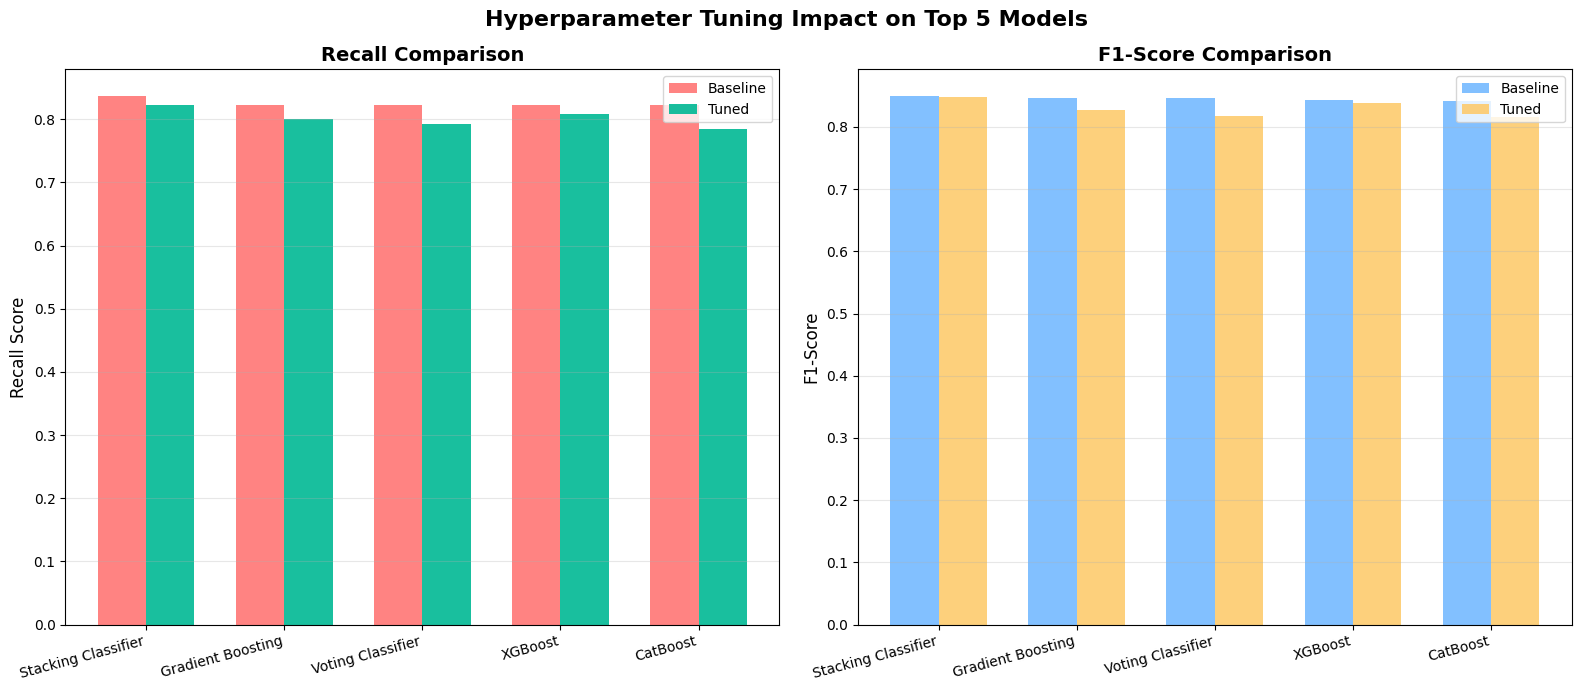

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Hyperparameter Tuning Impact on Top 5 Models', fontsize=16, fontweight='bold')

plot_models = []
plot_baseline_recall = []
plot_tuned_recall = []
plot_baseline_f1 = []
plot_tuned_f1 = []

for model_name in top_5_names:
    baseline_rows = comparison_df[(comparison_df['Model'] == model_name) &
                                 (comparison_df['Version'] == 'Baseline')]
    tuned_rows = comparison_df[(comparison_df['Model'] == model_name) &
                              (comparison_df['Version'] == 'Tuned')]

    if baseline_rows.empty or tuned_rows.empty:
        continue

    plot_models.append(model_name)
    plot_baseline_recall.append(baseline_rows.iloc[0]['Recall'])
    plot_tuned_recall.append(tuned_rows.iloc[0]['Recall'])
    plot_baseline_f1.append(baseline_rows.iloc[0]['F1-Score'])
    plot_tuned_f1.append(tuned_rows.iloc[0]['F1-Score'])

x = np.arange(len(plot_models))
width = 0.35

# Recall Chart
axes[0].bar(x - width/2, plot_baseline_recall, width, label='Baseline', color='#ff7675', alpha=0.9)
axes[0].bar(x + width/2, plot_tuned_recall, width, label='Tuned', color='#00b894', alpha=0.9)
axes[0].set_title('Recall Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Recall Score', fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(plot_models, rotation=15, ha='right', fontsize=10)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# F1-Score Chart
axes[1].bar(x - width/2, plot_baseline_f1, width, label='Baseline', color='#74b9ff', alpha=0.9)
axes[1].bar(x + width/2, plot_tuned_f1, width, label='Tuned', color='#fdcb6e', alpha=0.9)
axes[1].set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('F1-Score', fontsize=12)
axes[1].set_xticks(x)
axes[1].set_xticklabels(plot_models, rotation=15, ha='right', fontsize=10)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("="*80)
print(f"FINAL BEST MODEL: {best_model_name}")
print("="*80)
print(f"Recall:     {tuned_df.iloc[0]['Recall']:.4f}")
print(f"Precision:  {tuned_df.iloc[0]['Precision']:.4f}")
print(f"F1-Score:   {tuned_df.iloc[0]['F1-Score']:.4f}")
print(f"ROC-AUC:    {tuned_df.iloc[0]['ROC-AUC']:.4f}")

FINAL BEST MODEL: Stacking Classifier (Tuned)
Recall:     0.8222
Precision:  0.8740
F1-Score:   0.8473
ROC-AUC:    0.9390


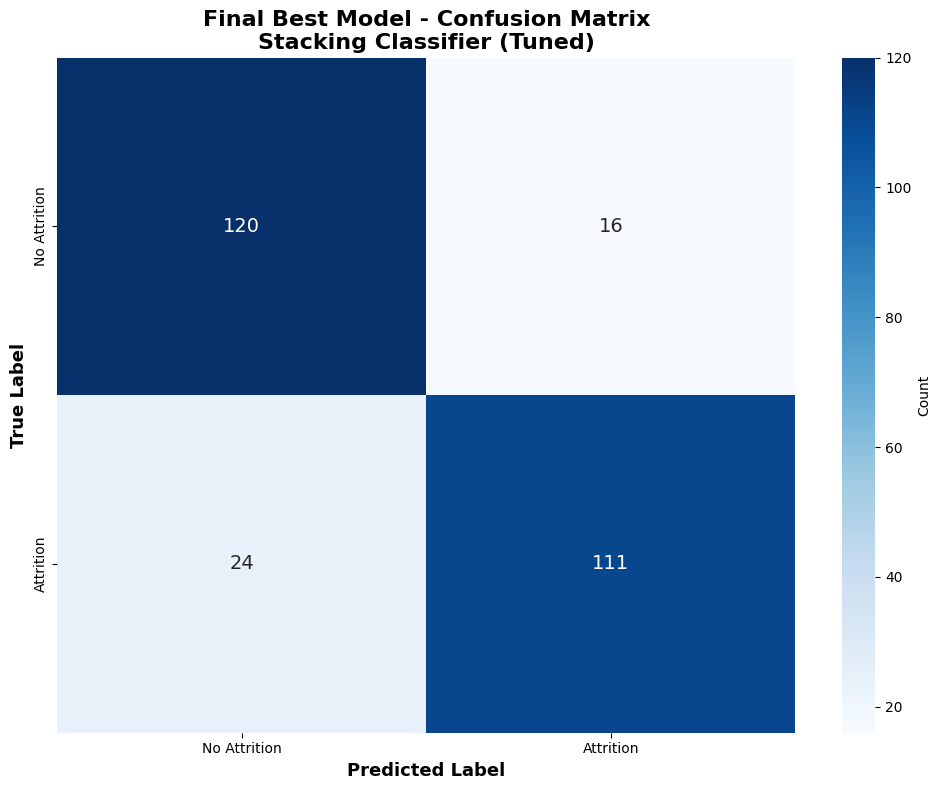

In [ ]:
# Final confusion matrix
y_pred_final = best_model_obj.predict(X_test_final)
cm_final = confusion_matrix(y_test_final, y_pred_final)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'],
            cbar_kws={'label': 'Count'}, annot_kws={'size': 14})
plt.title(f'Final Best Model - Confusion Matrix\n{best_model_name}',
          fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_test_final, y_pred_final,
                            target_names=['No Attrition (0)', 'Attrition (1)'],
                            zero_division=0))

                  precision    recall  f1-score   support

No Attrition (0)       0.83      0.88      0.86       136
   Attrition (1)       0.87      0.82      0.85       135

        accuracy                           0.85       271
       macro avg       0.85      0.85      0.85       271
    weighted avg       0.85      0.85      0.85       271



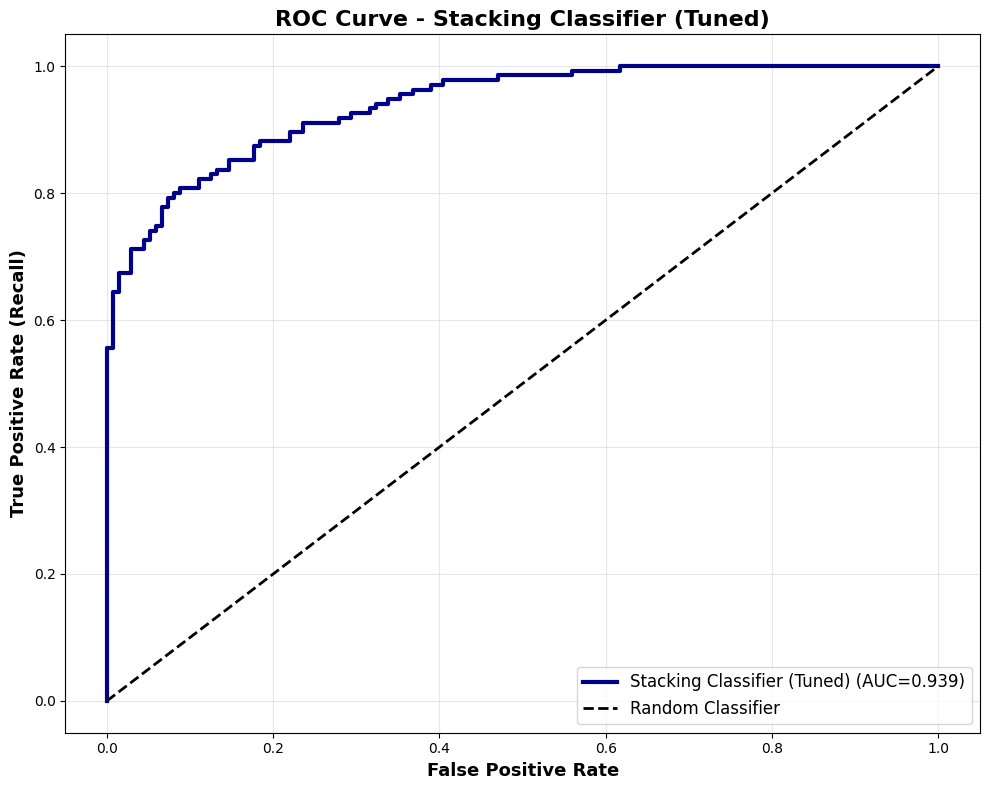

In [ ]:
# ROC Curve
if hasattr(best_model_obj, 'predict_proba'):
    y_pred_proba_final = best_model_obj.predict_proba(X_test_final)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_final, y_pred_proba_final)

    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, linewidth=3,
             label=f'{best_model_name} (AUC={tuned_df.iloc[0]["ROC-AUC"]:.3f})',
             color='darkblue')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
    plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
    plt.ylabel('True Positive Rate (Recall)', fontsize=13, fontweight='bold')
    plt.title(f'ROC Curve - {best_model_name}', fontsize=16, fontweight='bold')
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## Skenario 3

⚠️ Ensemble model - showing average importance from base estimators

✓ Top 20 Most Important Features:
                                  Feature  Importance
                         Years_Experience    6.786178
        Years_experience_lastorganization    5.588015
                                 JobTitle    2.783833
                        Job_Opportunities    2.043902
                     Emotional_Commitment    1.154005
                 Psychological_Exhaustion    1.072737
Training_programs_During_last_three_years    1.069975
                               Allowances    1.049784
                            Maritalstatus    0.976179
                               Department    0.906113
                         Payment_Overtime    0.814565
                              Job_Support    0.800488
                                   Sector    0.799917
                                      Age    0.750359
                           Job_Engagement    0.671977
                         Distance

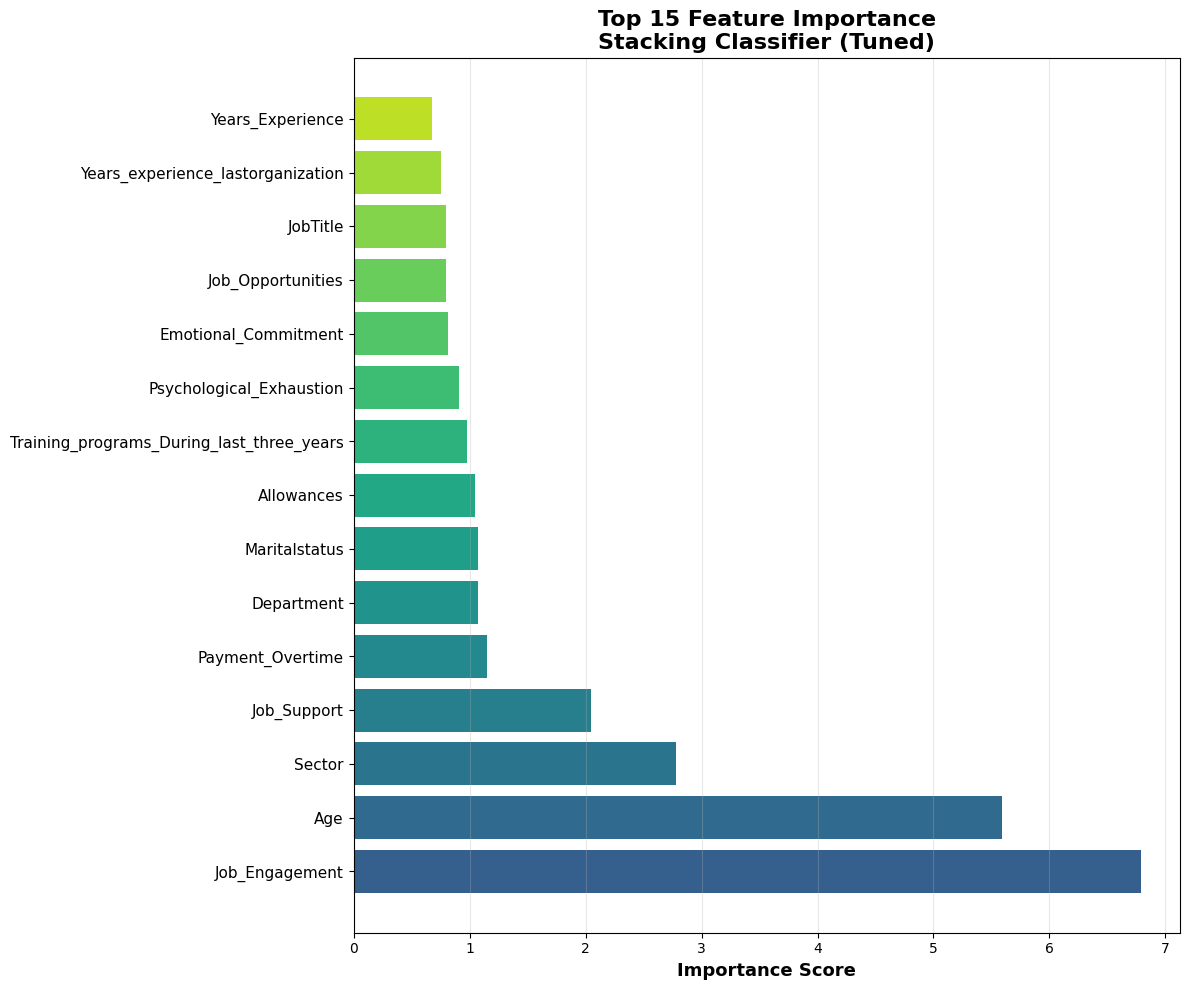

In [ ]:
feature_names = X_test_final.columns
importances = None

if hasattr(best_model_obj, 'feature_importances_'):
    importances = best_model_obj.feature_importances_
elif 'CatBoost' in str(type(best_model_obj)):
    importances = best_model_obj.get_feature_importance()
elif 'Voting' in best_model_name or 'Stacking' in best_model_name:
    print("⚠️ Ensemble model - showing average importance from base estimators")

    if 'Voting' in best_model_name:
        estimators = best_model_obj.estimators_
    else:  # Stacking
        estimators = best_model_obj.estimators_

    all_importances = []
    for est in estimators:
        if hasattr(est, 'feature_importances_'):
            all_importances.append(est.feature_importances_)
        elif 'CatBoost' in str(type(est)):
            all_importances.append(est.get_feature_importance())

    if all_importances:
        importances = np.mean(all_importances, axis=0)

if importances is not None:
    fi_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False).reset_index(drop=True)

    print("\n✓ Top 20 Most Important Features:")
    print(fi_df.head(20).to_string(index=False))

    # Horizontal bar chart
    plt.figure(figsize=(12, 10))
    top_15 = fi_df.head(15)
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_15)))
    plt.barh(range(len(top_15)-1, -1, -1), top_15['Importance'], color=colors)
    plt.yticks(range(len(top_15)), top_15['Feature'], fontsize=11)
    plt.xlabel('Importance Score', fontsize=13, fontweight='bold')
    plt.title(f'Top 15 Feature Importance\n{best_model_name}',
              fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("✗ Feature importance not available for this model type")

Tujuan dari skenario ini adalah untuk mengidentifikasi faktor-faktor utama yang mempengaruhi keputusan karyawan untuk keluar dari perusahaan. Analisis dilakukan dengan mengekstraksi skor feature importance dari model ensemble terbaik, yaitu Stacking Classifier (Tuned).

Hasil visualisasi menunjukkan bahwa `Job Engagement` menjadi fitur paling signifikan dalam memprediksi atrisi, diikuti oleh `Age`, `Sector`, dan `Job Support`. Faktor-faktor seperti `Payment Overtime`, `Department`, dan `Psychological Exhaustion` juga berkontribusi,tetapi tingkat pengaruhnya yang lebih rendah.

Dapat disimpulkan bahwa keterlibatan karyawan dalam pekerjaan (job engagement) dan  lingkungan kerja memiliki peran penting dalam mempertahankan mereka. Selain itu, usia dan sektor kerja juga menunjukkan pola unik, mengindikasikan adanya karakteristik attrition yang mungkin khas di wilayah atau organisasi tertentu.

#